In [1]:
import numpy as np
ln = np.log
from numpy import * # :)
import json
from time import sleep
import matplotlib.pyplot as plt
import os
import csv
from collections import defaultdict
from IPython.display import clear_output
import scipy.optimize as opti
import scipy.stats
import functools
from dataclasses import dataclass
import typing
import itertools as it
from glob import glob
import statistics as stat
import yaml

In [2]:
#print("\n".join(sorted(filter(lambda x : os.path.isdir(x) and not x.startswith("."), os.listdir()))))

In [3]:
interesting_dirs = ["tiny_forcing_repeat"] + ["new_simuls_"+str(i) for i in range(1,7+1)] #nothing
chaotic_dirs = ["tiny_forcing_repeat"] + ["new_simuls_" + str(i) for i in [4,5,6,7]] #nothing
same_param_dirs = ["same_params_"+str(i) for i in [1,3,4]] #nothing
same_param_long_baserun_dirs = ["same_params_long_baserun_"+str(i) for i in [1,2]] #nothing
test_dirs = ["test"] # nothing
different_params_long_baserun = ["different_params_long_final_" + str(i) for i in range(1,10)] # what a failure

hopefully_lower_variance = ["hopefully_lower_variance_" + str(i) for i in range(1,10)] # Re too low


low_variance_higher_re = ["low_variance_higher_re_" + str(i) for i in range(1,3)]

new_runs = ["same_params_short_final_"+str(i) for i in range(1,31)] # also something
long_final = ["same_params_long_final_"+str(i) for i in range(1,46)] # those work
high_Re_small_nx_again = ["high_Re_small_nx_again_"+str(i) for i in range(1,31)] #mach number is high
small_nx_better_mach_maybe = ["small_nx_better_mach_maybe_"+str(i) for i in range(1,31)] #mach number is high
much_smaller_mach_hopefully = ["much_smaller_mach_hopefully_"+str(i) for i in range(1,5)] # this is supersonic!!

even_more_test_runs = ["even_more_tests_"+str(i) for i in range(5)]

more_runs_A = ["more_runs_A_"+str(i) for i in range(51)] # only one succesful run????
more_runs_B = ["more_runs_B_"+str(i) for i in range(51)] # not turbulent
more_runs_C = ["more_runs_C_"+str(i) for i in range(51)] # merkwürdig linear
more_runs_D = ["more_runs_D_"+str(i) for i in range(51)] # nicht turbulent

new_fast_runs_A = ["new_fast_runs_A_"+str(i) for i in range(51)] # sieht besser aus
new_fast_runs_B = ["new_fast_runs_B_"+str(i) for i in range(51)] # nicht turbulent
new_fast_runs_C = ["new_fast_runs_C_"+str(i) for i in range(51)] # sieht gut aus
new_fast_runs_D = ["new_fast_runs_D_"+str(i) for i in range(51)] # merkwürdig linear

lower_sampling_A = ["lower_sampling_A_"+str(i) for i in range(41)]
lower_sampling_B = ["lower_sampling_B_"+str(i) for i in range(41)]
lower_sampling_C = ["lower_sampling_C_"+str(i) for i in range(41)]
lower_sampling_D = ["lower_sampling_D_"+str(i) for i in range(41)]

sample = ["sample_"+str(i) for i in range(1000)]

old_wave = ["old_wave_"+str(i) for i in range(300)]
old_wave_new_params = ["old_wave_new_params_"+str(i) for i in range(300)]
high_visc_sampling = ["higher_visc_sampling_"+str(i)  for i in range(500)]
large_visc = ["large_visc_"+str(i) for i in range(100)]
large_visc_sampling_sunday = ["large_visc_sampling_sunday_"+str(i) for i in range(200)]

detailed_A = ["detailed_A_" + str(i) for i in range(100)] # nice growth
detailed_B = ["detailed_B_" + str(i) for i in range(100)] # decrease
detailed_C = ["detailed_C_" + str(i) for i in range(100)] # growth yes, but somehow some simuls failed
detailed_D = ["detailed_D_" + str(i) for i in range(100)] # decrease
detailed_E = ["detailed_E_" + str(i) for i in range(100)] # decrease than increase, how to handle?
detailed_F = ["detailed_F_" + str(i) for i in range(100)] # sieht gut aus, aber mach sehr hoch

force13_A = ["force13_A_" + str(i) for i in range(200)] # decrease
force13_B = ["force13_B_" + str(i) for i in range(200)] # dip
force13_C = ["force13_C_" + str(i) for i in range(200)] # decrease

hel_one = ["hel_one_" + str(i) for i in range(200)] # dip
hel_half = ["hel_half_" + str(i) for i in range(200)] # also a dip

hel_one = ["hel_one_" + str(i) for i in range(200)] # dip
hel_half = ["hel_half_" + str(i) for i in range(200)] # also a dip

hel_one_higher_force = ["hel_one_higher_force_" + str(i) for i in range(200)]
hel_half_higher_force = ["hel_half_higher_force_" + str(i) for i in range(200)]
hel_zero_higher_force = ["hel_zero_higher_force_" + str(i) for i in range(200)]

new_hel_one = ["new_hel_one_" + str(i) for i in range(200)]
new_hel_half = ["new_hel_half_" + str(i) for i in range(200)]
new_hel_zero = ["new_hel_zero_" + str(i) for i in range(200)]

A_hel_one = glob("A_hel_one_*") + glob("Anew_hel_one_*")
A_hel_half = glob("A_hel_half_*") + glob("Anew_hel_half_*")
A_hel_zero = glob("A_hel_zero_*") + glob("Anew_hel_zero_*")

A_correct_hel_one = glob("A_correct_hel_one_*")
A_correct_hel_half = glob("A_correct_hel_half_*")
A_correct_hel_zero = glob("A_correct_hel_zero_*")


In [8]:
def filter_successful(simuls):
    return list(filter(lambda d : os.path.isfile(d+"/results.csv"), simuls))
print(len(filter_successful(A_hel_half)))

30


In [97]:
#when the mesh reynolds number is lower than 1, it is inefficient but accurate, large is worse
#mach number: cannot do more than 0.5, because we dont have shock viscosity, maybe fine if no crashes and we dont see artifacts
    #maybe orange is still safe

In [9]:
#################
#################
active_simuls = force13_B
#################
#################

            
print(len(active_simuls))
active_simuls = list(filter(lambda d : os.path.isfile(d+"/results.csv"), active_simuls))
print(len(active_simuls))

# check validity -> seems silly now that I filter all the failed runs automatically
for d in active_simuls:
    
    if not os.path.isfile(d+"/results.csv"):
        print(d , " does not have results")

print(active_simuls)
print(len(active_simuls))

200
40
['force13_B_41', 'force13_B_42', 'force13_B_43', 'force13_B_44', 'force13_B_45', 'force13_B_46', 'force13_B_47', 'force13_B_48', 'force13_B_49', 'force13_B_50', 'force13_B_51', 'force13_B_52', 'force13_B_53', 'force13_B_54', 'force13_B_55', 'force13_B_56', 'force13_B_57', 'force13_B_58', 'force13_B_59', 'force13_B_60', 'force13_B_61', 'force13_B_62', 'force13_B_63', 'force13_B_64', 'force13_B_65', 'force13_B_66', 'force13_B_67', 'force13_B_68', 'force13_B_69', 'force13_B_70', 'force13_B_71', 'force13_B_72', 'force13_B_73', 'force13_B_74', 'force13_B_75', 'force13_B_76', 'force13_B_77', 'force13_B_78', 'force13_B_79', 'force13_B_80']
40


['urms', 'urms_var', 'mach', 'mach_var', 'Re', 'Re_var', 'Re_mesh', 'Re_mesh_var', 'var', 'real_time', 'timestep']
[196.78786523 196.83457283 196.89296371 196.9515356  197.01023698
 197.06906312 197.12767389 197.18634833 197.24491695 197.30331595
 197.36200602 197.42060356 197.47883823]
DIRECTORY:  force13_B_41
mach: 0.6769078534383041
mesh_Re:  2.0511445787652463
urms:  0.2089278711722447
Re:  41.78557423444896
{'save_steps': 25, 'viscosity': 0.005, 'forcing_magnitude': 0.13, 'relhel': 1.0, 'forcing_kmin': 0.8, 'forcing_kmax': 1.2, 'nx': 128, 'ny': 128, 'nz': 128, 'dsx': 0.04908738521234052, 'dsy': 0.04908738521234052, 'dsz': 0.04908738521234052}


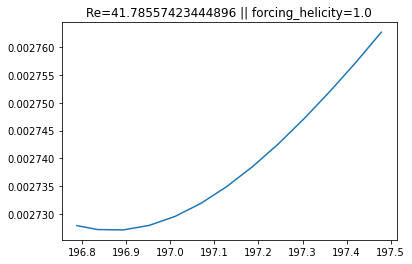


['urms', 'urms_var', 'mach', 'mach_var', 'Re', 'Re_var', 'Re_mesh', 'Re_mesh_var', 'var', 'real_time', 'timestep']
[200.23039804 200.28060882 200.34385454 200.40748635 200.4712933
 200.53563847 200.60040595 200.6652435  200.73045339 200.79583925
 200.86098577 200.92613457 200.99150069]
DIRECTORY:  force13_B_42
mach: 0.5211720247299243
mesh_Re:  1.498438291392137
urms:  0.1526296710356688
Re:  30.525934207133755
{'save_steps': 25, 'viscosity': 0.005, 'forcing_magnitude': 0.13, 'relhel': 1.0, 'forcing_kmin': 0.8, 'forcing_kmax': 1.2, 'nx': 128, 'ny': 128, 'nz': 128, 'dsx': 0.04908738521234052, 'dsy': 0.04908738521234052, 'dsz': 0.04908738521234052}


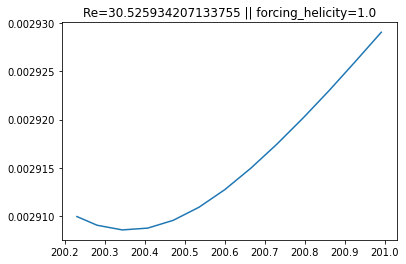


['urms', 'urms_var', 'mach', 'mach_var', 'Re', 'Re_var', 'Re_mesh', 'Re_mesh_var', 'var', 'real_time', 'timestep']
[192.25106765 192.30176099 192.36485889 192.42805745 192.49137308
 192.55474894 192.61787368 192.68095609 192.74404013 192.80744666
 192.87082375 192.93438459 192.99825816]
DIRECTORY:  force13_B_43
mach: 0.543993160663507
mesh_Re:  1.463408364633103
urms:  0.14906155199576648
Re:  29.812310399153297
{'save_steps': 25, 'viscosity': 0.005, 'forcing_magnitude': 0.13, 'relhel': 1.0, 'forcing_kmin': 0.8, 'forcing_kmax': 1.2, 'nx': 128, 'ny': 128, 'nz': 128, 'dsx': 0.04908738521234052, 'dsy': 0.04908738521234052, 'dsz': 0.04908738521234052}


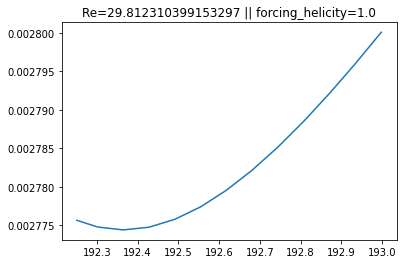


['urms', 'urms_var', 'mach', 'mach_var', 'Re', 'Re_var', 'Re_mesh', 'Re_mesh_var', 'var', 'real_time', 'timestep']
[192.9391423  192.99060005 193.05470003 193.11870284 193.18259333
 193.24673201 193.31097474 193.3751095  193.43909281 193.50292504
 193.56678589 193.63054387 193.69451497]
DIRECTORY:  force13_B_44
mach: 0.5316117925521655
mesh_Re:  1.3181153752782226
urms:  0.13426212962621295
Re:  26.852425925242592
{'save_steps': 25, 'viscosity': 0.005, 'forcing_magnitude': 0.13, 'relhel': 1.0, 'forcing_kmin': 0.8, 'forcing_kmax': 1.2, 'nx': 128, 'ny': 128, 'nz': 128, 'dsx': 0.04908738521234052, 'dsy': 0.04908738521234052, 'dsz': 0.04908738521234052}


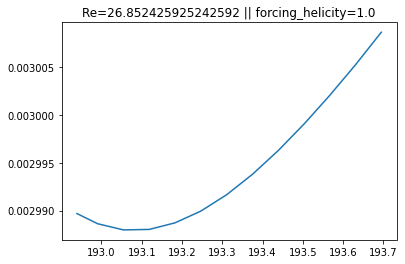


['urms', 'urms_var', 'mach', 'mach_var', 'Re', 'Re_var', 'Re_mesh', 'Re_mesh_var', 'var', 'real_time', 'timestep']
[207.43351815 207.48905567 207.55843119 207.6280139  207.69784614
 207.76785373 207.83786291 207.90821085 207.97888836 208.04952816
 208.12029416 208.19067156 208.26079584]
DIRECTORY:  force13_B_45
mach: 0.3959810007841159
mesh_Re:  1.3328498681674559
urms:  0.13576297274766824
Re:  27.152594549533642
{'save_steps': 25, 'viscosity': 0.005, 'forcing_magnitude': 0.13, 'relhel': 1.0, 'forcing_kmin': 0.8, 'forcing_kmax': 1.2, 'nx': 128, 'ny': 128, 'nz': 128, 'dsx': 0.04908738521234052, 'dsy': 0.04908738521234052, 'dsz': 0.04908738521234052}


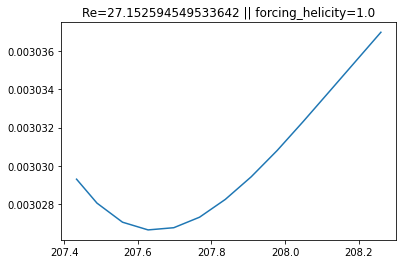


['urms', 'urms_var', 'mach', 'mach_var', 'Re', 'Re_var', 'Re_mesh', 'Re_mesh_var', 'var', 'real_time', 'timestep']
[188.59373229 188.63848959 188.6945945  188.7509931  188.80757778
 188.8641751  188.92059433 188.97675716 189.03259698 189.08828011
 189.14405806 189.20000032 189.25602714]
DIRECTORY:  force13_B_46
mach: 0.7453366469114256
mesh_Re:  2.4009008025371
urms:  0.24455374758212997
Re:  48.91074951642598
{'save_steps': 25, 'viscosity': 0.005, 'forcing_magnitude': 0.13, 'relhel': 1.0, 'forcing_kmin': 0.8, 'forcing_kmax': 1.2, 'nx': 128, 'ny': 128, 'nz': 128, 'dsx': 0.04908738521234052, 'dsy': 0.04908738521234052, 'dsz': 0.04908738521234052}


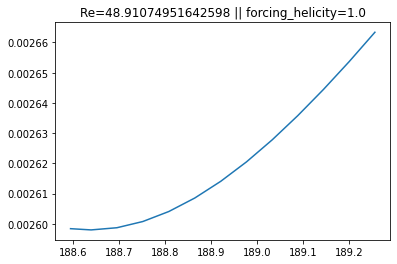


['urms', 'urms_var', 'mach', 'mach_var', 'Re', 'Re_var', 'Re_mesh', 'Re_mesh_var', 'var', 'real_time', 'timestep']
[201.69955539 201.75956699 201.83505889 201.91052734 201.98630682
 202.06211725 202.13819212 202.21467462 202.29133758 202.3672236
 202.44309947 202.51922245 202.5954861 ]
DIRECTORY:  force13_B_47
mach: 0.2974347246763034
mesh_Re:  0.8586295877512057
urms:  0.08745929163235883
Re:  17.491858326471768
{'save_steps': 25, 'viscosity': 0.005, 'forcing_magnitude': 0.13, 'relhel': 1.0, 'forcing_kmin': 0.8, 'forcing_kmax': 1.2, 'nx': 128, 'ny': 128, 'nz': 128, 'dsx': 0.04908738521234052, 'dsy': 0.04908738521234052, 'dsz': 0.04908738521234052}


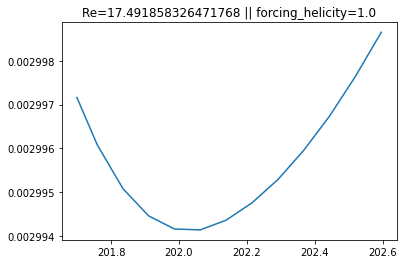


['urms', 'urms_var', 'mach', 'mach_var', 'Re', 'Re_var', 'Re_mesh', 'Re_mesh_var', 'var', 'real_time', 'timestep']
[198.19539868 198.24460649 198.30615106 198.36763075 198.42894835
 198.49061198 198.55241606 198.61432994 198.67635834 198.7387063
 198.80129203 198.86378461 198.92641417]
DIRECTORY:  force13_B_48
mach: 0.5837919409458453
mesh_Re:  1.5710134697509812
urms:  0.1600221179998838
Re:  32.004423599976754
{'save_steps': 25, 'viscosity': 0.005, 'forcing_magnitude': 0.13, 'relhel': 1.0, 'forcing_kmin': 0.8, 'forcing_kmax': 1.2, 'nx': 128, 'ny': 128, 'nz': 128, 'dsx': 0.04908738521234052, 'dsy': 0.04908738521234052, 'dsz': 0.04908738521234052}


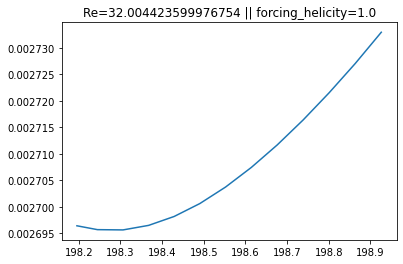


['urms', 'urms_var', 'mach', 'mach_var', 'Re', 'Re_var', 'Re_mesh', 'Re_mesh_var', 'var', 'real_time', 'timestep']
[199.8605585  199.90973238 199.97109114 200.03282312 200.09448264
 200.15590521 200.21723197 200.27868546 200.34021886 200.40200898
 200.46381179 200.52601748 200.58840971]
DIRECTORY:  force13_B_49
mach: 0.5862293859322866
mesh_Re:  1.4955217773977325
urms:  0.15233259735963284
Re:  30.46651947192657
{'save_steps': 25, 'viscosity': 0.005, 'forcing_magnitude': 0.13, 'relhel': 1.0, 'forcing_kmin': 0.8, 'forcing_kmax': 1.2, 'nx': 128, 'ny': 128, 'nz': 128, 'dsx': 0.04908738521234052, 'dsy': 0.04908738521234052, 'dsz': 0.04908738521234052}


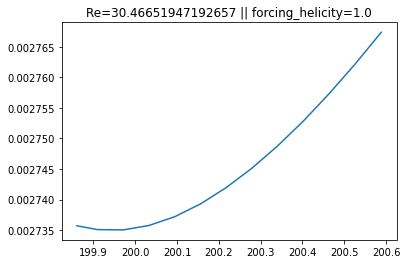


['urms', 'urms_var', 'mach', 'mach_var', 'Re', 'Re_var', 'Re_mesh', 'Re_mesh_var', 'var', 'real_time', 'timestep']
[196.02486668 196.07229063 196.13165238 196.19105806 196.25035086
 196.30972605 196.36923219 196.4287053  196.48824961 196.54770108
 196.60729097 196.66679787 196.72652096]
DIRECTORY:  force13_B_50
mach: 0.6442939759829105
mesh_Re:  1.697649766937988
urms:  0.17292118531007034
Re:  34.58423706201407
{'save_steps': 25, 'viscosity': 0.005, 'forcing_magnitude': 0.13, 'relhel': 1.0, 'forcing_kmin': 0.8, 'forcing_kmax': 1.2, 'nx': 128, 'ny': 128, 'nz': 128, 'dsx': 0.04908738521234052, 'dsy': 0.04908738521234052, 'dsz': 0.04908738521234052}


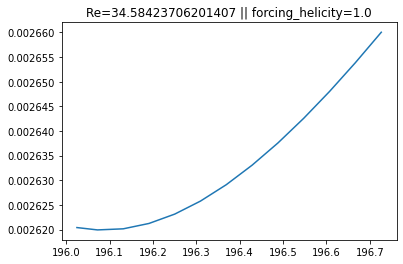


['urms', 'urms_var', 'mach', 'mach_var', 'Re', 'Re_var', 'Re_mesh', 'Re_mesh_var', 'var', 'real_time', 'timestep']
[199.37417071 199.42966148 199.49909601 199.56857535 199.6378669
 199.70690952 199.77588008 199.8446064  199.91342945 199.9825688
 200.0516049  200.12052815 200.18940213]
DIRECTORY:  force13_B_51
mach: 0.4232646190967315
mesh_Re:  1.2540900119487308
urms:  0.12774055966964132
Re:  25.54811193392827
{'save_steps': 25, 'viscosity': 0.005, 'forcing_magnitude': 0.13, 'relhel': 1.0, 'forcing_kmin': 0.8, 'forcing_kmax': 1.2, 'nx': 128, 'ny': 128, 'nz': 128, 'dsx': 0.04908738521234052, 'dsy': 0.04908738521234052, 'dsz': 0.04908738521234052}


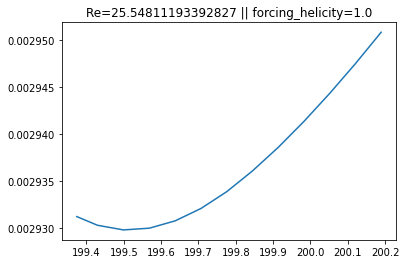


['urms', 'urms_var', 'mach', 'mach_var', 'Re', 'Re_var', 'Re_mesh', 'Re_mesh_var', 'var', 'real_time', 'timestep']
[191.40403609 191.45282399 191.51401275 191.575445   191.63690443
 191.6986792  191.76046534 191.82221906 191.88392885 191.94572464
 192.00759534 192.0692543  192.1307925 ]
DIRECTORY:  force13_B_52
mach: 0.5906208226313958
mesh_Re:  1.7217708373653033
urms:  0.17537813736842234
Re:  35.07562747368445
{'save_steps': 25, 'viscosity': 0.005, 'forcing_magnitude': 0.13, 'relhel': 1.0, 'forcing_kmin': 0.8, 'forcing_kmax': 1.2, 'nx': 128, 'ny': 128, 'nz': 128, 'dsx': 0.04908738521234052, 'dsy': 0.04908738521234052, 'dsz': 0.04908738521234052}


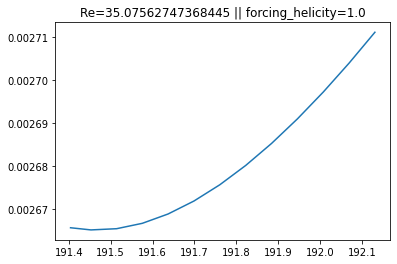


['urms', 'urms_var', 'mach', 'mach_var', 'Re', 'Re_var', 'Re_mesh', 'Re_mesh_var', 'var', 'real_time', 'timestep']
[189.91494942 189.96616949 190.02996338 190.09377504 190.15726257
 190.22072816 190.28398837 190.3475947  190.41115328 190.47479016
 190.53815552 190.60147322 190.66466243]
DIRECTORY:  force13_B_53
mach: 0.5403866816789675
mesh_Re:  1.4435933841944304
urms:  0.14704321466195275
Re:  29.408642932390556
{'save_steps': 25, 'viscosity': 0.005, 'forcing_magnitude': 0.13, 'relhel': 1.0, 'forcing_kmin': 0.8, 'forcing_kmax': 1.2, 'nx': 128, 'ny': 128, 'nz': 128, 'dsx': 0.04908738521234052, 'dsy': 0.04908738521234052, 'dsz': 0.04908738521234052}


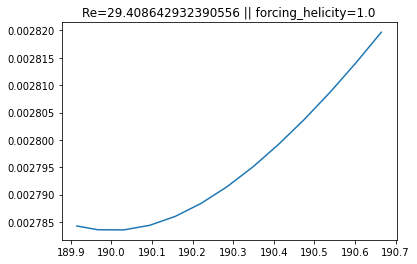


['urms', 'urms_var', 'mach', 'mach_var', 'Re', 'Re_var', 'Re_mesh', 'Re_mesh_var', 'var', 'real_time', 'timestep']
[203.53256947 203.5812279  203.64216498 203.70322305 203.7642882
 203.82564525 203.88722937 203.94862508 204.00990302 204.07163389
 204.13397276 204.19654127 204.25944108]
DIRECTORY:  force13_B_54
mach: 0.5906177245653592
mesh_Re:  1.4525208867860222
urms:  0.14795256260878
Re:  29.590512521756004
{'save_steps': 25, 'viscosity': 0.005, 'forcing_magnitude': 0.13, 'relhel': 1.0, 'forcing_kmin': 0.8, 'forcing_kmax': 1.2, 'nx': 128, 'ny': 128, 'nz': 128, 'dsx': 0.04908738521234052, 'dsy': 0.04908738521234052, 'dsz': 0.04908738521234052}


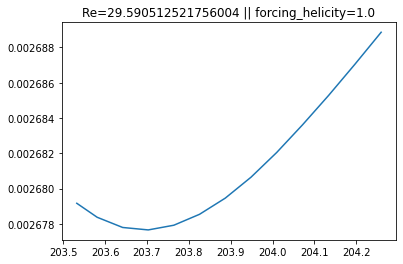


['urms', 'urms_var', 'mach', 'mach_var', 'Re', 'Re_var', 'Re_mesh', 'Re_mesh_var', 'var', 'real_time', 'timestep']
[212.27238245 212.32504271 212.39091812 212.45680269 212.52274574
 212.58845189 212.65430533 212.7201647  212.78591764 212.8516546
 212.91729919 212.98272895 213.04801155]
DIRECTORY:  force13_B_55
mach: 0.49672436324449687
mesh_Re:  1.4581527410325
urms:  0.14852621857172404
Re:  29.70524371434481
{'save_steps': 25, 'viscosity': 0.005, 'forcing_magnitude': 0.13, 'relhel': 1.0, 'forcing_kmin': 0.8, 'forcing_kmax': 1.2, 'nx': 128, 'ny': 128, 'nz': 128, 'dsx': 0.04908738521234052, 'dsy': 0.04908738521234052, 'dsz': 0.04908738521234052}


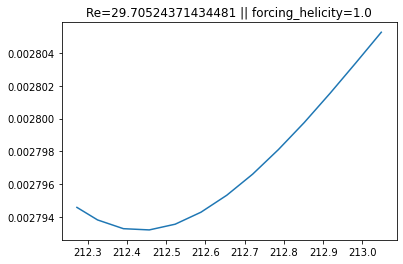


['urms', 'urms_var', 'mach', 'mach_var', 'Re', 'Re_var', 'Re_mesh', 'Re_mesh_var', 'var', 'real_time', 'timestep']
[198.68535709 198.73716722 198.80219871 198.8671311  198.93237898
 198.99758347 199.06288225 199.12833606 199.1940293  199.25993425
 199.32593638 199.3917389  199.45757874]
DIRECTORY:  force13_B_56
mach: 0.49473421802887546
mesh_Re:  1.3622616632267028
urms:  0.13875883359175462
Re:  27.75176671835093
{'save_steps': 25, 'viscosity': 0.005, 'forcing_magnitude': 0.13, 'relhel': 1.0, 'forcing_kmin': 0.8, 'forcing_kmax': 1.2, 'nx': 128, 'ny': 128, 'nz': 128, 'dsx': 0.04908738521234052, 'dsy': 0.04908738521234052, 'dsz': 0.04908738521234052}


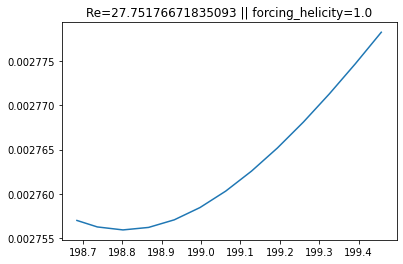


['urms', 'urms_var', 'mach', 'mach_var', 'Re', 'Re_var', 'Re_mesh', 'Re_mesh_var', 'var', 'real_time', 'timestep']
[200.84967628 200.89643247 200.95485402 201.01305025 201.07130413
 201.12955399 201.18784319 201.24593109 201.30417091 201.36263916
 201.42086924 201.47892598 201.53679359]
DIRECTORY:  force13_B_57
mach: 0.679361245723871
mesh_Re:  1.6104747437952485
urms:  0.16404161036778722
Re:  32.808322073557434
{'save_steps': 25, 'viscosity': 0.005, 'forcing_magnitude': 0.13, 'relhel': 1.0, 'forcing_kmin': 0.8, 'forcing_kmax': 1.2, 'nx': 128, 'ny': 128, 'nz': 128, 'dsx': 0.04908738521234052, 'dsy': 0.04908738521234052, 'dsz': 0.04908738521234052}


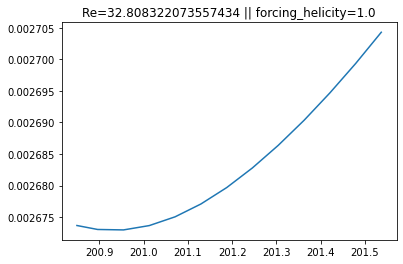


['urms', 'urms_var', 'mach', 'mach_var', 'Re', 'Re_var', 'Re_mesh', 'Re_mesh_var', 'var', 'real_time', 'timestep']
[194.65119972 194.70809485 194.77902862 194.84980664 194.92037814
 194.99118581 195.06223319 195.13378499 195.20547326 195.27708117
 195.34880916 195.42040905 195.49216593]
DIRECTORY:  force13_B_58
mach: 0.3763603098881551
mesh_Re:  1.0719665919662733
urms:  0.10918962044211536
Re:  21.83792408842307
{'save_steps': 25, 'viscosity': 0.005, 'forcing_magnitude': 0.13, 'relhel': 1.0, 'forcing_kmin': 0.8, 'forcing_kmax': 1.2, 'nx': 128, 'ny': 128, 'nz': 128, 'dsx': 0.04908738521234052, 'dsy': 0.04908738521234052, 'dsz': 0.04908738521234052}


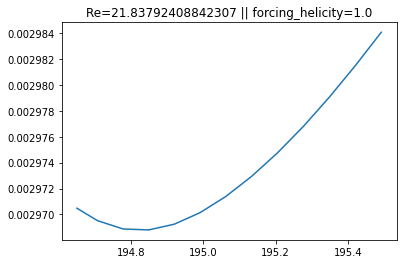


['urms', 'urms_var', 'mach', 'mach_var', 'Re', 'Re_var', 'Re_mesh', 'Re_mesh_var', 'var', 'real_time', 'timestep']
[205.2081767  205.26429423 205.33492186 205.40543322 205.47550631
 205.54556419 205.61533644 205.68480719 205.75407905 205.82332107
 205.89280159 205.96233926 206.03174274]
DIRECTORY:  force13_B_59
mach: 0.40397740610134913
mesh_Re:  1.2602715901102663
urms:  0.12837021005077237
Re:  25.67404201015448
{'save_steps': 25, 'viscosity': 0.005, 'forcing_magnitude': 0.13, 'relhel': 1.0, 'forcing_kmin': 0.8, 'forcing_kmax': 1.2, 'nx': 128, 'ny': 128, 'nz': 128, 'dsx': 0.04908738521234052, 'dsy': 0.04908738521234052, 'dsz': 0.04908738521234052}


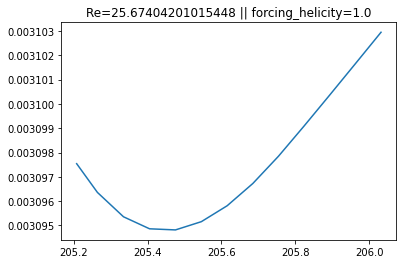


['urms', 'urms_var', 'mach', 'mach_var', 'Re', 'Re_var', 'Re_mesh', 'Re_mesh_var', 'var', 'real_time', 'timestep']
[202.25081786 202.29732508 202.35531251 202.4136256  202.47224734
 202.53126169 202.59057274 202.65002882 202.70968327 202.76940873
 202.82935399 202.88926354 202.94900526]
DIRECTORY:  force13_B_60
mach: 0.6576103007182096
mesh_Re:  1.507488150576343
urms:  0.15355148212267802
Re:  30.710296424535606
{'save_steps': 25, 'viscosity': 0.005, 'forcing_magnitude': 0.13, 'relhel': 1.0, 'forcing_kmin': 0.8, 'forcing_kmax': 1.2, 'nx': 128, 'ny': 128, 'nz': 128, 'dsx': 0.04908738521234052, 'dsy': 0.04908738521234052, 'dsz': 0.04908738521234052}


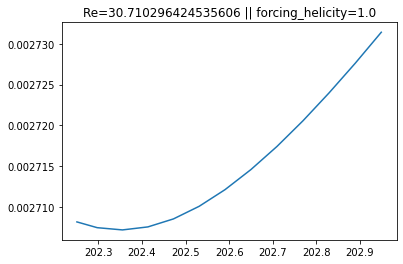


['urms', 'urms_var', 'mach', 'mach_var', 'Re', 'Re_var', 'Re_mesh', 'Re_mesh_var', 'var', 'real_time', 'timestep']
[193.31185859 193.3609774  193.42249338 193.48397514 193.54530028
 193.60629757 193.6672103  193.72800854 193.78883925 193.84984209
 193.91067341 193.97142174 194.0322006 ]
DIRECTORY:  force13_B_61
mach: 0.6116492849129898
mesh_Re:  1.7410114986724872
urms:  0.17733797503587526
Re:  35.46759500717505
{'save_steps': 25, 'viscosity': 0.005, 'forcing_magnitude': 0.13, 'relhel': 1.0, 'forcing_kmin': 0.8, 'forcing_kmax': 1.2, 'nx': 128, 'ny': 128, 'nz': 128, 'dsx': 0.04908738521234052, 'dsy': 0.04908738521234052, 'dsz': 0.04908738521234052}


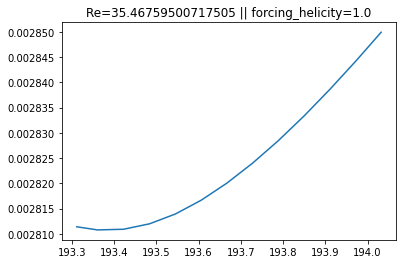


['urms', 'urms_var', 'mach', 'mach_var', 'Re', 'Re_var', 'Re_mesh', 'Re_mesh_var', 'var', 'real_time', 'timestep']
[197.38902036 197.44353861 197.51227558 197.58106148 197.64995109
 197.71883616 197.78726535 197.85626473 197.92539742 197.99480076
 198.06480395 198.13474484 198.20426135]
DIRECTORY:  force13_B_62
mach: 0.4223589272071153
mesh_Re:  1.1128034501311188
urms:  0.11334922865797313
Re:  22.669845731594627
{'save_steps': 25, 'viscosity': 0.005, 'forcing_magnitude': 0.13, 'relhel': 1.0, 'forcing_kmin': 0.8, 'forcing_kmax': 1.2, 'nx': 128, 'ny': 128, 'nz': 128, 'dsx': 0.04908738521234052, 'dsy': 0.04908738521234052, 'dsz': 0.04908738521234052}


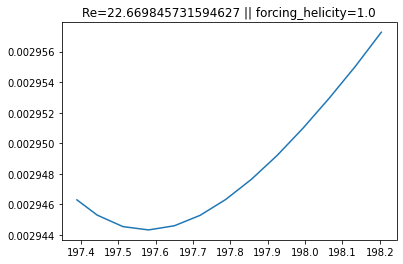


['urms', 'urms_var', 'mach', 'mach_var', 'Re', 'Re_var', 'Re_mesh', 'Re_mesh_var', 'var', 'real_time', 'timestep']
[200.9855308  201.03891381 201.10514259 201.17105987 201.23700053
 201.30274408 201.36844784 201.43396222 201.4995728  201.56488758
 201.63002536 201.69524986 201.76060924]
DIRECTORY:  force13_B_63
mach: 0.4901542801887561
mesh_Re:  1.3512203111547587
urms:  0.1376341707049272
Re:  27.526834140985436
{'save_steps': 25, 'viscosity': 0.005, 'forcing_magnitude': 0.13, 'relhel': 1.0, 'forcing_kmin': 0.8, 'forcing_kmax': 1.2, 'nx': 128, 'ny': 128, 'nz': 128, 'dsx': 0.04908738521234052, 'dsy': 0.04908738521234052, 'dsz': 0.04908738521234052}


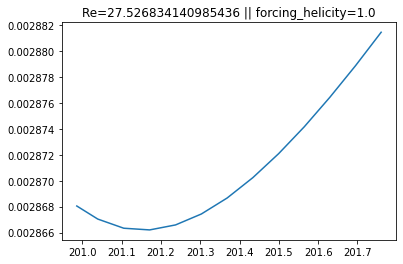


['urms', 'urms_var', 'mach', 'mach_var', 'Re', 'Re_var', 'Re_mesh', 'Re_mesh_var', 'var', 'real_time', 'timestep']
[193.13734675 193.19132343 193.2589429  193.32641144 193.39376798
 193.46086681 193.52788514 193.59505146 193.66236471 193.72963259
 193.79700416 193.86448315 193.93210863]
DIRECTORY:  force13_B_64
mach: 0.4533096324938994
mesh_Re:  1.2370467903231805
urms:  0.12600455137017444
Re:  25.20091027403489
{'save_steps': 25, 'viscosity': 0.005, 'forcing_magnitude': 0.13, 'relhel': 1.0, 'forcing_kmin': 0.8, 'forcing_kmax': 1.2, 'nx': 128, 'ny': 128, 'nz': 128, 'dsx': 0.04908738521234052, 'dsy': 0.04908738521234052, 'dsz': 0.04908738521234052}


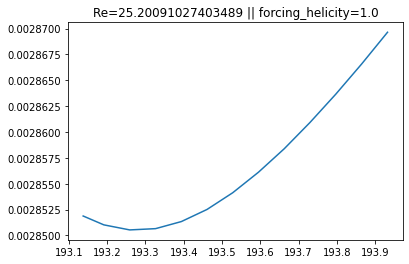


['urms', 'urms_var', 'mach', 'mach_var', 'Re', 'Re_var', 'Re_mesh', 'Re_mesh_var', 'var', 'real_time', 'timestep']
[198.83430779 198.88845653 198.95571144 199.02256061 199.08937952
 199.15589066 199.22245284 199.28936856 199.3560392  199.42258108
 199.48893795 199.55537689 199.62190055]
DIRECTORY:  force13_B_65
mach: 0.4652658305107019
mesh_Re:  1.4048580682427114
urms:  0.14309766777814964
Re:  28.61953355562993
{'save_steps': 25, 'viscosity': 0.005, 'forcing_magnitude': 0.13, 'relhel': 1.0, 'forcing_kmin': 0.8, 'forcing_kmax': 1.2, 'nx': 128, 'ny': 128, 'nz': 128, 'dsx': 0.04908738521234052, 'dsy': 0.04908738521234052, 'dsz': 0.04908738521234052}


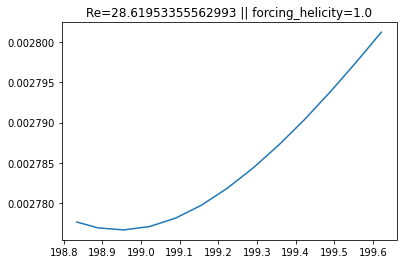


['urms', 'urms_var', 'mach', 'mach_var', 'Re', 'Re_var', 'Re_mesh', 'Re_mesh_var', 'var', 'real_time', 'timestep']
[206.27531258 206.32743507 206.39290277 206.4588035  206.52469577
 206.59027508 206.65573332 206.72155406 206.78746356 206.85372669
 206.91970082 206.9855012  207.05105392]
DIRECTORY:  force13_B_66
mach: 0.49885441110684325
mesh_Re:  1.205506586560281
urms:  0.1227918925957802
Re:  24.55837851915604
{'save_steps': 25, 'viscosity': 0.005, 'forcing_magnitude': 0.13, 'relhel': 1.0, 'forcing_kmin': 0.8, 'forcing_kmax': 1.2, 'nx': 128, 'ny': 128, 'nz': 128, 'dsx': 0.04908738521234052, 'dsy': 0.04908738521234052, 'dsz': 0.04908738521234052}


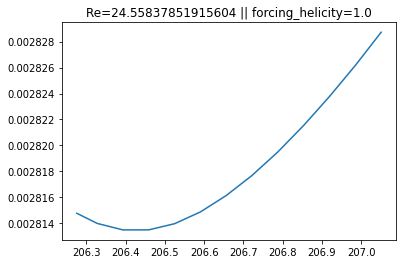


['urms', 'urms_var', 'mach', 'mach_var', 'Re', 'Re_var', 'Re_mesh', 'Re_mesh_var', 'var', 'real_time', 'timestep']
[198.35260059 198.40782693 198.47693482 198.5462038  198.61537502
 198.68474587 198.75438805 198.82341332 198.89224335 198.96139244
 199.03124729 199.1014201  199.17176509]
DIRECTORY:  force13_B_67
mach: 0.4122103781272204
mesh_Re:  1.1930638491816807
urms:  0.12152448577376512
Re:  24.30489715475302
{'save_steps': 25, 'viscosity': 0.005, 'forcing_magnitude': 0.13, 'relhel': 1.0, 'forcing_kmin': 0.8, 'forcing_kmax': 1.2, 'nx': 128, 'ny': 128, 'nz': 128, 'dsx': 0.04908738521234052, 'dsy': 0.04908738521234052, 'dsz': 0.04908738521234052}


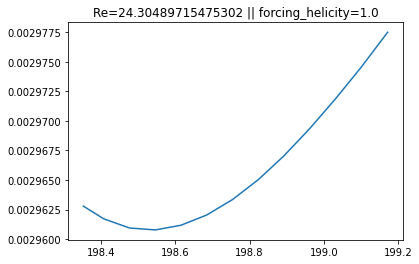


['urms', 'urms_var', 'mach', 'mach_var', 'Re', 'Re_var', 'Re_mesh', 'Re_mesh_var', 'var', 'real_time', 'timestep']
[200.50970992 200.56341306 200.63010988 200.69622263 200.76221844
 200.82803658 200.89369009 200.95955569 201.02582259 201.09231957
 201.15912005 201.22582472 201.29222424]
DIRECTORY:  force13_B_68
mach: 0.47477137767351596
mesh_Re:  1.3784505119982606
urms:  0.14040781618692935
Re:  28.081563237385872
{'save_steps': 25, 'viscosity': 0.005, 'forcing_magnitude': 0.13, 'relhel': 1.0, 'forcing_kmin': 0.8, 'forcing_kmax': 1.2, 'nx': 128, 'ny': 128, 'nz': 128, 'dsx': 0.04908738521234052, 'dsy': 0.04908738521234052, 'dsz': 0.04908738521234052}


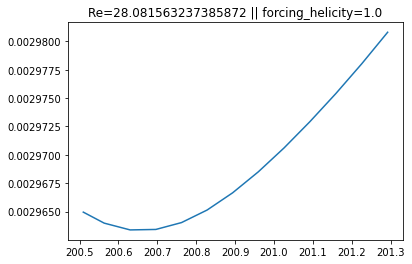


['urms', 'urms_var', 'mach', 'mach_var', 'Re', 'Re_var', 'Re_mesh', 'Re_mesh_var', 'var', 'real_time', 'timestep']
[204.99867954 205.05318261 205.12140057 205.18983812 205.25792626
 205.326101   205.39455938 205.46292685 205.53090913 205.59880189
 205.66633015 205.73386517 205.80111435]
DIRECTORY:  force13_B_69
mach: 0.44072288511655267
mesh_Re:  1.2534643494566073
urms:  0.12767683021151102
Re:  25.535366042302204
{'save_steps': 25, 'viscosity': 0.005, 'forcing_magnitude': 0.13, 'relhel': 1.0, 'forcing_kmin': 0.8, 'forcing_kmax': 1.2, 'nx': 128, 'ny': 128, 'nz': 128, 'dsx': 0.04908738521234052, 'dsy': 0.04908738521234052, 'dsz': 0.04908738521234052}


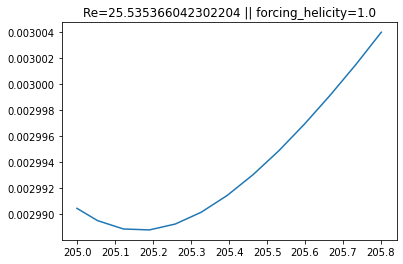


['urms', 'urms_var', 'mach', 'mach_var', 'Re', 'Re_var', 'Re_mesh', 'Re_mesh_var', 'var', 'real_time', 'timestep']
[202.19571776 202.25164438 202.321194   202.39107163 202.46063401
 202.53027366 202.5999386  202.66932048 202.73828769 202.8072061
 202.8762965  202.94557474 203.01462243]
DIRECTORY:  force13_B_70
mach: 0.41368178541843714
mesh_Re:  1.1082703081295369
urms:  0.112887486605308
Re:  22.577497321061596
{'save_steps': 25, 'viscosity': 0.005, 'forcing_magnitude': 0.13, 'relhel': 1.0, 'forcing_kmin': 0.8, 'forcing_kmax': 1.2, 'nx': 128, 'ny': 128, 'nz': 128, 'dsx': 0.04908738521234052, 'dsy': 0.04908738521234052, 'dsz': 0.04908738521234052}


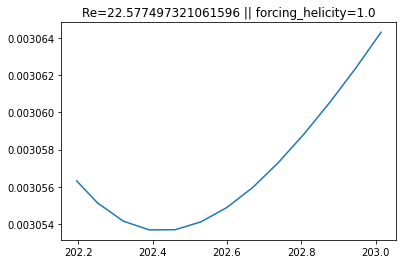


['urms', 'urms_var', 'mach', 'mach_var', 'Re', 'Re_var', 'Re_mesh', 'Re_mesh_var', 'var', 'real_time', 'timestep']
[208.10396862 208.15632258 208.22185092 208.28747526 208.35258178
 208.41752595 208.48284293 208.54801754 208.61311638 208.67803851
 208.74308925 208.8088325  208.87473262]
DIRECTORY:  force13_B_71
mach: 0.4987808407881321
mesh_Re:  1.3371827329329142
urms:  0.13620431472857794
Re:  27.24086294571559
{'save_steps': 25, 'viscosity': 0.005, 'forcing_magnitude': 0.13, 'relhel': 1.0, 'forcing_kmin': 0.8, 'forcing_kmax': 1.2, 'nx': 128, 'ny': 128, 'nz': 128, 'dsx': 0.04908738521234052, 'dsy': 0.04908738521234052, 'dsz': 0.04908738521234052}


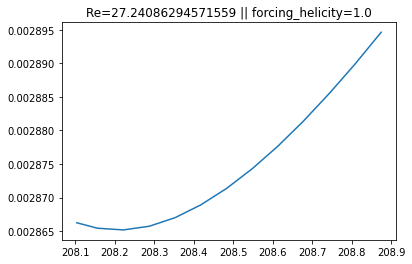


['urms', 'urms_var', 'mach', 'mach_var', 'Re', 'Re_var', 'Re_mesh', 'Re_mesh_var', 'var', 'real_time', 'timestep']
[204.39554422 204.44568965 204.50828503 204.57072654 204.63333876
 204.69635716 204.75980559 204.82334061 204.88713251 204.95055145
 205.01376689 205.07703654 205.14036158]
DIRECTORY:  force13_B_72
mach: 0.5550107810741817
mesh_Re:  1.5636009227351646
urms:  0.15926708216086413
Re:  31.85341643217283
{'save_steps': 25, 'viscosity': 0.005, 'forcing_magnitude': 0.13, 'relhel': 1.0, 'forcing_kmin': 0.8, 'forcing_kmax': 1.2, 'nx': 128, 'ny': 128, 'nz': 128, 'dsx': 0.04908738521234052, 'dsy': 0.04908738521234052, 'dsz': 0.04908738521234052}


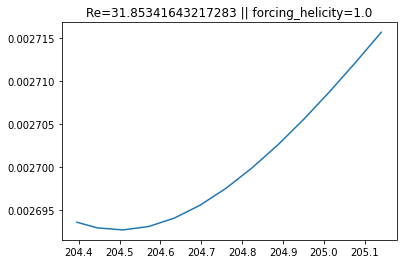


['urms', 'urms_var', 'mach', 'mach_var', 'Re', 'Re_var', 'Re_mesh', 'Re_mesh_var', 'var', 'real_time', 'timestep']
[195.09232047 195.1410878  195.20203032 195.26289165 195.32377694
 195.38449278 195.44525223 195.50573447 195.56619282 195.62680421
 195.68741344 195.74781452 195.8083021 ]
DIRECTORY:  force13_B_73
mach: 0.611931089254526
mesh_Re:  1.7354882750959675
urms:  0.1767753841021122
Re:  35.35507682042244
{'save_steps': 25, 'viscosity': 0.005, 'forcing_magnitude': 0.13, 'relhel': 1.0, 'forcing_kmin': 0.8, 'forcing_kmax': 1.2, 'nx': 128, 'ny': 128, 'nz': 128, 'dsx': 0.04908738521234052, 'dsy': 0.04908738521234052, 'dsz': 0.04908738521234052}


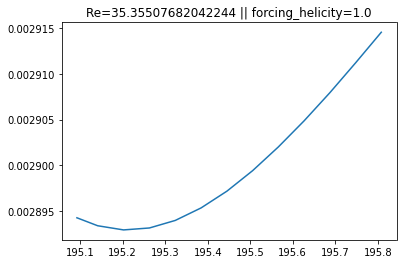


['urms', 'urms_var', 'mach', 'mach_var', 'Re', 'Re_var', 'Re_mesh', 'Re_mesh_var', 'var', 'real_time', 'timestep']
[182.85601528 182.90979284 182.97717044 183.0443382  183.11161358
 183.17871918 183.2458832  183.31302544 183.38036582 183.44788797
 183.51539976 183.58282216 183.65035617]
DIRECTORY:  force13_B_74
mach: 0.4595810476786051
mesh_Re:  1.2808579280534336
urms:  0.1304671172148142
Re:  26.093423442962845
{'save_steps': 25, 'viscosity': 0.005, 'forcing_magnitude': 0.13, 'relhel': 1.0, 'forcing_kmin': 0.8, 'forcing_kmax': 1.2, 'nx': 128, 'ny': 128, 'nz': 128, 'dsx': 0.04908738521234052, 'dsy': 0.04908738521234052, 'dsz': 0.04908738521234052}


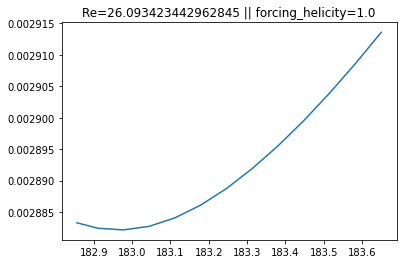


['urms', 'urms_var', 'mach', 'mach_var', 'Re', 'Re_var', 'Re_mesh', 'Re_mesh_var', 'var', 'real_time', 'timestep']
[189.25700923 189.30105641 189.35611883 189.4111868  189.46624943
 189.52111039 189.57596869 189.63084258 189.68569227 189.74048217
 189.79544122 189.85030002 189.90542725]
DIRECTORY:  force13_B_75
mach: 0.7840999890596438
mesh_Re:  1.9044685740410523
urms:  0.19398757601395628
Re:  38.79751520279127
{'save_steps': 25, 'viscosity': 0.005, 'forcing_magnitude': 0.13, 'relhel': 1.0, 'forcing_kmin': 0.8, 'forcing_kmax': 1.2, 'nx': 128, 'ny': 128, 'nz': 128, 'dsx': 0.04908738521234052, 'dsy': 0.04908738521234052, 'dsz': 0.04908738521234052}


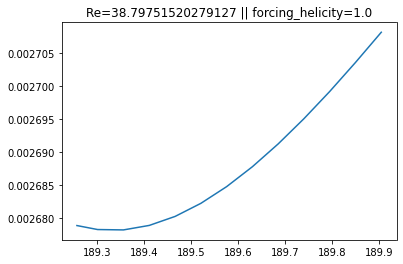


['urms', 'urms_var', 'mach', 'mach_var', 'Re', 'Re_var', 'Re_mesh', 'Re_mesh_var', 'var', 'real_time', 'timestep']
[189.60470699 189.66194697 189.73344245 189.80478877 189.87577866
 189.9466372  190.0174212  190.08762822 190.1575448  190.22744773
 190.29719238 190.36674113 190.43593768]
DIRECTORY:  force13_B_76
mach: 0.39111297375116594
mesh_Re:  1.1678958033575575
urms:  0.11896088967720667
Re:  23.792177935441334
{'save_steps': 25, 'viscosity': 0.005, 'forcing_magnitude': 0.13, 'relhel': 1.0, 'forcing_kmin': 0.8, 'forcing_kmax': 1.2, 'nx': 128, 'ny': 128, 'nz': 128, 'dsx': 0.04908738521234052, 'dsy': 0.04908738521234052, 'dsz': 0.04908738521234052}


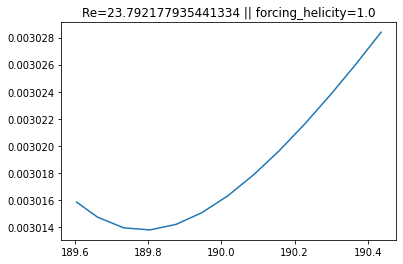


['urms', 'urms_var', 'mach', 'mach_var', 'Re', 'Re_var', 'Re_mesh', 'Re_mesh_var', 'var', 'real_time', 'timestep']
[198.05265799 198.10829254 198.1779705  198.24769655 198.31742583
 198.38770434 198.45790084 198.52833036 198.59876285 198.66892255
 198.73923641 198.80970915 198.88016075]
DIRECTORY:  force13_B_77
mach: 0.39318318565686544
mesh_Re:  1.0677626605479633
urms:  0.10876141150410358
Re:  21.752282300820717
{'save_steps': 25, 'viscosity': 0.005, 'forcing_magnitude': 0.13, 'relhel': 1.0, 'forcing_kmin': 0.8, 'forcing_kmax': 1.2, 'nx': 128, 'ny': 128, 'nz': 128, 'dsx': 0.04908738521234052, 'dsy': 0.04908738521234052, 'dsz': 0.04908738521234052}


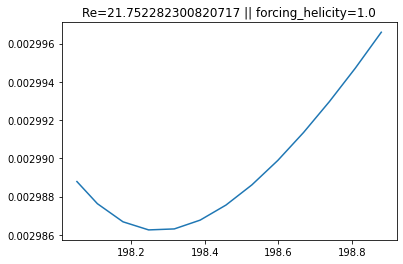


['urms', 'urms_var', 'mach', 'mach_var', 'Re', 'Re_var', 'Re_mesh', 'Re_mesh_var', 'var', 'real_time', 'timestep']
[201.9791961  202.02785068 202.08897092 202.15035949 202.21202249
 202.273439   202.33495449 202.39668006 202.45858063 202.52078651
 202.58323032 202.64577365 202.70855679]
DIRECTORY:  force13_B_78
mach: 0.5861003275101002
mesh_Re:  1.7569932290028107
urms:  0.1789658607198642
Re:  35.79317214397284
{'save_steps': 25, 'viscosity': 0.005, 'forcing_magnitude': 0.13, 'relhel': 1.0, 'forcing_kmin': 0.8, 'forcing_kmax': 1.2, 'nx': 128, 'ny': 128, 'nz': 128, 'dsx': 0.04908738521234052, 'dsy': 0.04908738521234052, 'dsz': 0.04908738521234052}


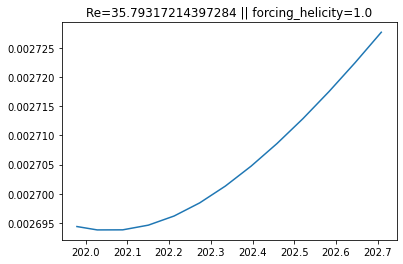


['urms', 'urms_var', 'mach', 'mach_var', 'Re', 'Re_var', 'Re_mesh', 'Re_mesh_var', 'var', 'real_time', 'timestep']
[197.87638902 197.92270602 197.98090799 198.03886435 198.09661306
 198.15452445 198.21216319 198.26991027 198.32735251 198.38455224
 198.4417486  198.49877351 198.55559003]
DIRECTORY:  force13_B_79
mach: 0.705160761338014
mesh_Re:  1.9279975317517488
urms:  0.19638421596624914
Re:  39.276843193249825
{'save_steps': 25, 'viscosity': 0.005, 'forcing_magnitude': 0.13, 'relhel': 1.0, 'forcing_kmin': 0.8, 'forcing_kmax': 1.2, 'nx': 128, 'ny': 128, 'nz': 128, 'dsx': 0.04908738521234052, 'dsy': 0.04908738521234052, 'dsz': 0.04908738521234052}


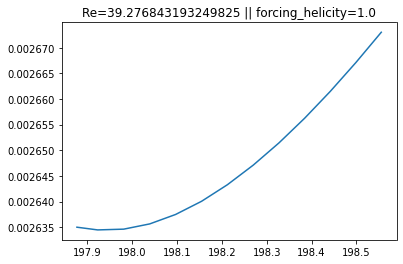


['urms', 'urms_var', 'mach', 'mach_var', 'Re', 'Re_var', 'Re_mesh', 'Re_mesh_var', 'var', 'real_time', 'timestep']
[195.43521905 195.48279686 195.54250551 195.60228005 195.66222839
 195.72209837 195.78186856 195.84169202 195.90153275 195.96108903
 196.02040101 196.07981741 196.13932068]
DIRECTORY:  force13_B_80
mach: 0.6397352712276654
mesh_Re:  1.7692458172272363
urms:  0.18021389910807975
Re:  36.04277982161595
{'save_steps': 25, 'viscosity': 0.005, 'forcing_magnitude': 0.13, 'relhel': 1.0, 'forcing_kmin': 0.8, 'forcing_kmax': 1.2, 'nx': 128, 'ny': 128, 'nz': 128, 'dsx': 0.04908738521234052, 'dsy': 0.04908738521234052, 'dsz': 0.04908738521234052}


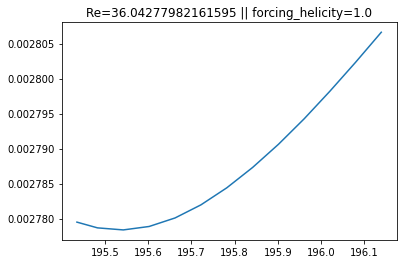

In [10]:


res = {}
opts = {}

param_space = [] # tuples: (dirname, Re, mach, hel)

mach_numbers = []
Re_numbers = []

for dirname in active_simuls:
    
    results = defaultdict(list)
    with open(dirname+"/results.csv", "r") as f:
        reader = csv.DictReader(f)
        print(reader.fieldnames)
        for row in reader:
            for k,v in row.items():
                results[k].append(float(v))
    res[dirname] = {k: np.array(v) for k,v in results.items()}            
    
    mach_mean = np.mean(res[dirname]["mach"])
    mesh_Re_mean = np.mean(res[dirname]["Re_mesh"])
    urms_mean = np.mean(res[dirname]["urms"])
    Re_mean = np.mean(res[dirname]["Re"])
    print(res[dirname]["real_time"])
    
    
    print("DIRECTORY: ", dirname)
    print("mach:", mach_mean)
    print("mesh_Re: ", mesh_Re_mean)
    print("urms: ", urms_mean)
    print("Re: ", Re_mean)
    
    with open(dirname+"/core_options.json", "r") as f:
        opts[dirname] = json.load(f)
        print(opts[dirname])
    

    param_space.append((dirname, Re_mean, mach_mean, opts[dirname]["relhel"]))
    mach_numbers.append(mach_mean)
    Re_numbers.append(Re_mean)
    
    plt.plot(res[dirname]["real_time"],res[dirname]["var"])
    relhel = opts[dirname]["relhel"]
    plt.title(f"Re={Re_mean} || forcing_helicity={relhel}")
    #plt.yscale("log")
    plt.show()
    print(("="*10+"\n")*3)


In [11]:
# start fitting at minimum or something, not at t0
# first decay might be "transient", adjusting to eigenmodes

0.5272021314597283
0.11201956429546553
29.70592721016743
6.17805158390873


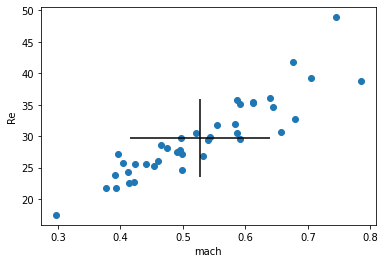

In [12]:
mach_mean = stat.mean(mach_numbers)
mach_var = np.sqrt(stat.variance(mach_numbers))
Re_mean = stat.mean(Re_numbers)
Re_var = np.sqrt(stat.variance(Re_numbers))

print(mach_mean)
print(mach_var)
print(Re_mean)
print(Re_var)

plt.scatter(mach_numbers, Re_numbers)
plt.errorbar([mach_mean], [Re_mean], xerr=mach_var, yerr=Re_var, color="black")
plt.xlabel("mach")
plt.ylabel("Re")
plt.show()

In [13]:
Re2simul = dict(sorted(
    {np.mean(res[c]["Re"]) : {**res[c], "dir": c} for c in active_simuls}.items()))

# lists are ordered, sets arent
active_list = list(active_simuls)
Re_list = [np.mean(res[c]["Re"]) for c in active_list]
relvar = [res[c]["var"]/res[c]["var"][0] for c in active_list]
#logrelvar = [np.log(res[c]["welf_var"]/res[c]["welf_var"][0]) for c in active_list]
time_elapsed = [res[c]["real_time"] - res[c]["real_time"][0] for c in active_list]

def all_the_same(ls):
    return all(x==ls[0] for x in ls)
assert(all_the_same(list((map(len,[active_list, Re_list, relvar, time_elapsed])))))

A 0.000665
b -0.01154


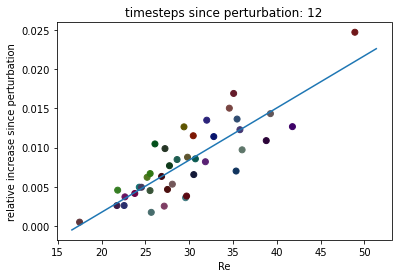

In [14]:
# relative increase after n timesteps 
# (this is not a proper definition for growth, but ok to get an idea)
rand_color = np.random.rand(len(Re2simul),3)*0.5
for n in range(1,len(relvar[0])):
    Re, rel_increase = list(zip(*[(Re , res["var"][n]/res["var"][0]) for Re, res in Re2simul.items()]))
    rel_increase = np.log(rel_increase)
    
    linres = scipy.stats.linregress(Re,rel_increase)
    Abest, bbest = linres.slope, linres.intercept
    print("A",round(Abest,6))
    print("b", round(bbest,5))
    
    xline = np.linspace(min(Re)*0.95, max(Re)*1.05)
    plt.plot(xline, (lambda x: Abest*x+bbest)(xline))
    plt.scatter(Re, rel_increase, c=rand_color)
    plt.title(f"timesteps since perturbation: {n}")
    plt.ylabel("relative increase since perturbation")
    plt.xlabel("Re")
    plt.show()
    sleep(0.1) # commented out for when I rerun the notebook
    clear_output(wait=True)

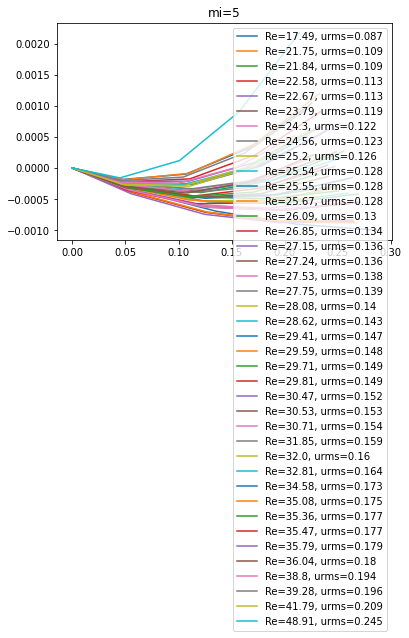

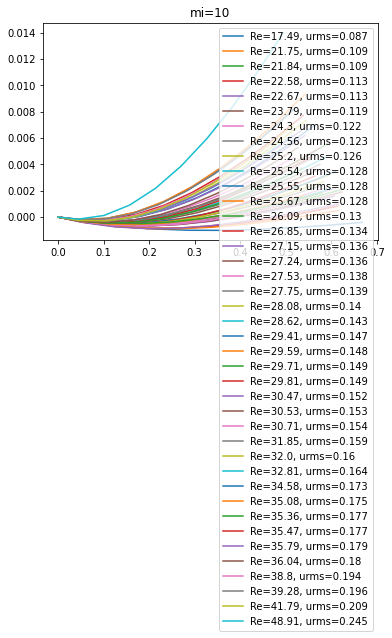

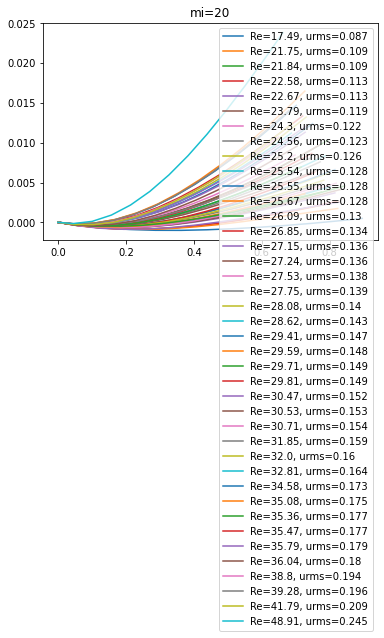

In [15]:
def normalize(data):
    return data/data[0]

def adjust(data):
    ln = np.log
    #return ln(data/data[0])
    #return ln(ln(data/data[0]) + 1) # still nonlinear growth
    #return ln(ln(ln(data/data[0]) + 1) + 1) # still nonlinear
    return ln(ln(ln(ln(data/data[0]) + 1) + 1) + 1) # still nonlinear


for mi in [5,10,20]:
    for Re, r in list(Re2simul.items())[::]:
        relhel = opts[r["dir"]]["relhel"]
        urms = np.mean(r["urms"])
        #plt.plot(r["time"], r["urms"])
        plt.plot(r["real_time"][:mi] - r["real_time"][0], adjust(r["var"])[:mi], label=f"Re={round(Re,2)}, urms={round(urms, 3)}")

    x = linspace(0,1.4,20)
    

    #plt.xlim(0.0,0.4)
    #plt.ylim(0.999, 1.015)
    #plt.yscale("log")
    plt.title(f"mi={mi}")
    plt.legend()
    plt.show()  

datapoints: 8 out of 13 available
force13_B_41
Fitres(a=2.381243163310368, b=0.0328172596457278, rsq=0.9944705111303307, a_err=0.07248942590027996, simul_name='force13_B_41')


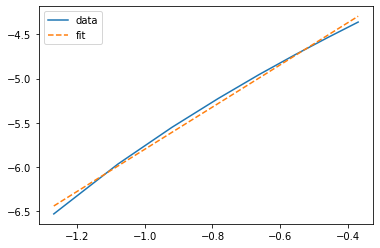

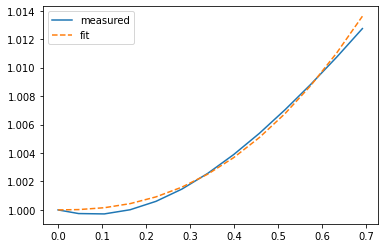

datapoints: 8 out of 13 available
force13_B_42
Fitres(a=3.1139209978336218, b=0.018723099292579683, rsq=0.9631688737442233, a_err=0.2485926276328058, simul_name='force13_B_42')


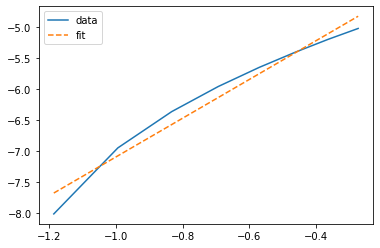

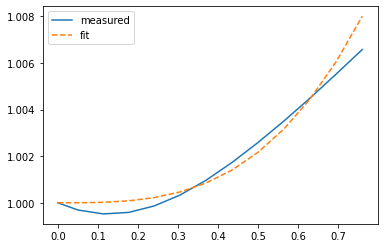

datapoints: 8 out of 13 available
force13_B_43
Fitres(a=2.8500864416073313, b=0.02294732971606079, rsq=0.9829451276908604, a_err=0.1532646528595323, simul_name='force13_B_43')


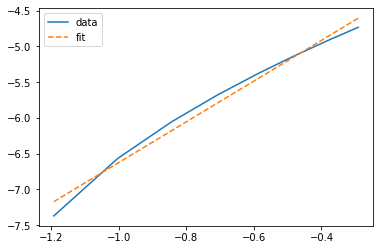

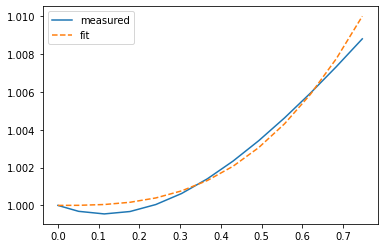

datapoints: 8 out of 13 available
force13_B_44
Fitres(a=4.322282865988402, b=0.03128658881808551, rsq=0.9024979457731909, a_err=0.5799911034886903, simul_name='force13_B_44')


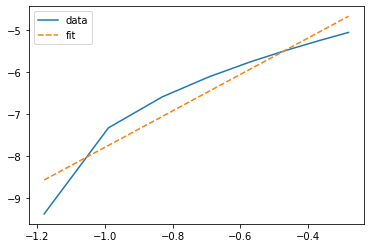

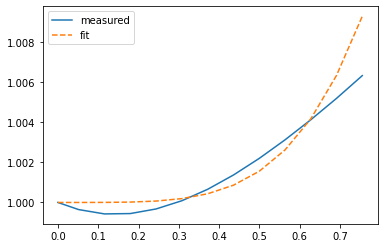

datapoints: 8 out of 13 available
force13_B_45
Fitres(a=6.752312672934498, b=0.014956819133620434, rsq=0.8401383138471701, a_err=1.4727171632520748, simul_name='force13_B_45')


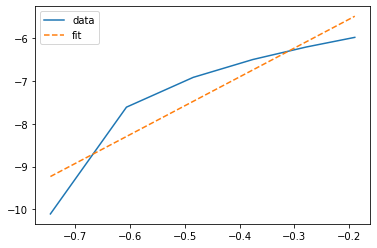

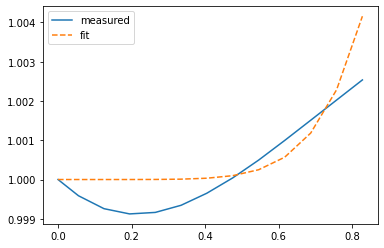

datapoints: 8 out of 13 available
force13_B_46
Fitres(a=2.0676140837034582, b=0.060497451802268, rsq=0.9985730183709415, a_err=0.031908995590696106, simul_name='force13_B_46')


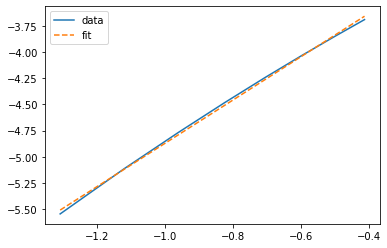

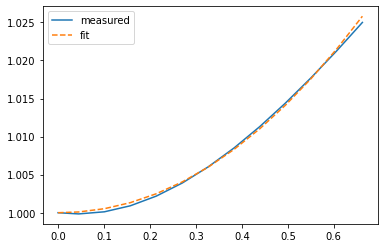

datapoints: 8 out of 13 available
force13_B_47
Fitres(a=12.718313017390818, b=0.0020078712792884054, rsq=1.0, a_err=0.0, simul_name='force13_B_47')


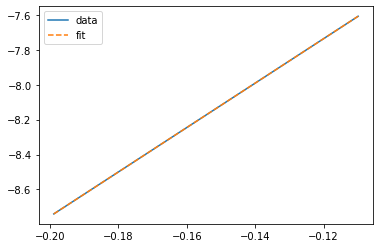

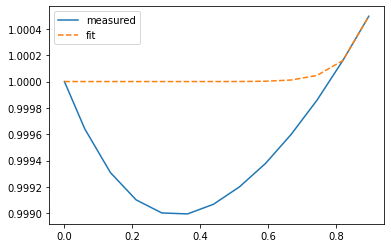

datapoints: 8 out of 13 available
force13_B_48
Fitres(a=2.3594421706324953, b=0.030211490834378008, rsq=0.9950400166131103, a_err=0.06800698943625787, simul_name='force13_B_48')


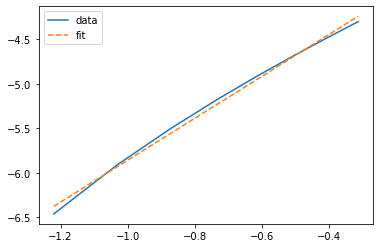

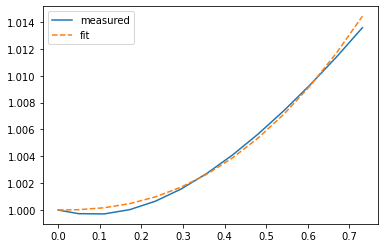

datapoints: 8 out of 13 available
force13_B_49
Fitres(a=2.3943356073061057, b=0.026283341370468425, rsq=0.9953333077895171, a_err=0.06693136918967338, simul_name='force13_B_49')


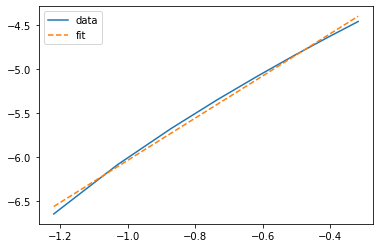

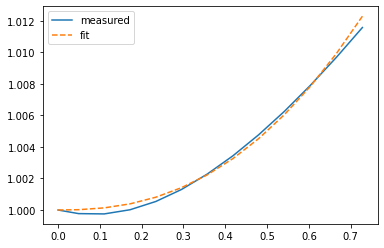

datapoints: 8 out of 13 available
force13_B_50
Fitres(a=2.2045576753058467, b=0.03447050969175895, rsq=0.9975783414100772, a_err=0.04434337985858853, simul_name='force13_B_50')


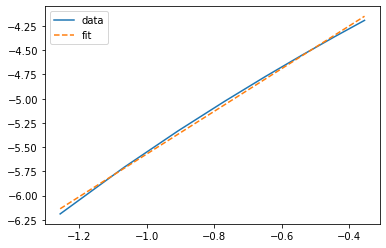

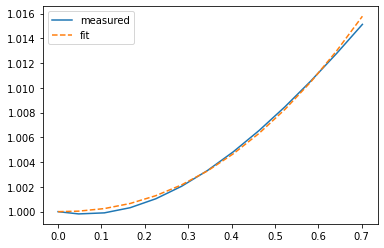

datapoints: 8 out of 13 available
force13_B_51
Fitres(a=3.3097306176104464, b=0.016144009451339803, rsq=0.9623301882256893, a_err=0.26733245860543914, simul_name='force13_B_51')


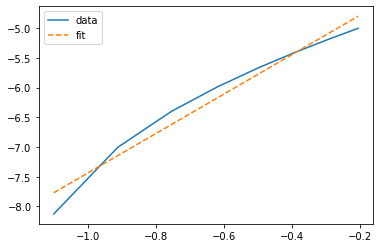

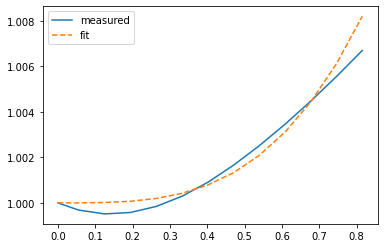

datapoints: 8 out of 13 available
force13_B_52
Fitres(a=2.192191095396473, b=0.035582040831256476, rsq=0.9980595820979117, a_err=0.039461372492527964, simul_name='force13_B_52')


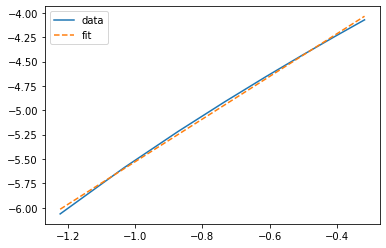

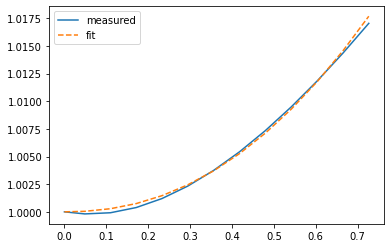

datapoints: 8 out of 13 available
force13_B_53
Fitres(a=2.371348828350771, b=0.026712168364588774, rsq=0.9953329229429652, a_err=0.06629154176663236, simul_name='force13_B_53')


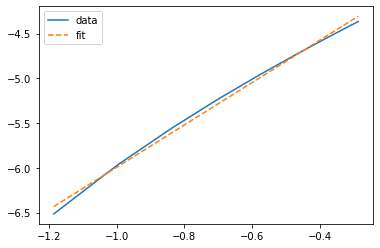

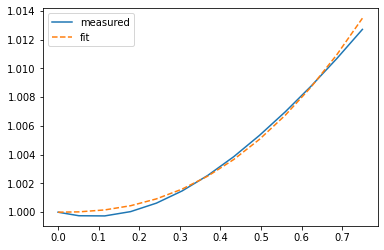

datapoints: 8 out of 13 available
force13_B_54
Fitres(a=4.521128493424912, b=0.02107783613925112, rsq=0.9152141381534639, a_err=0.6154066818094858, simul_name='force13_B_54')


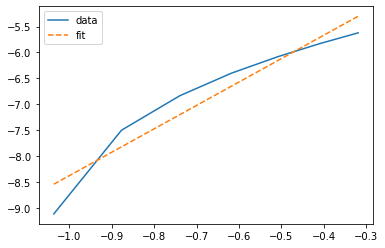

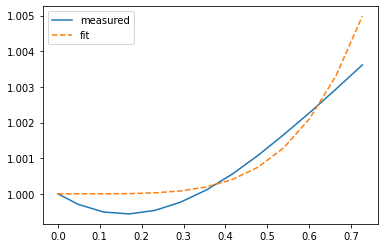

datapoints: 8 out of 13 available
force13_B_55
Fitres(a=3.6181469157394393, b=0.011547501333869847, rsq=0.9611643663866969, a_err=0.32525019237263575, simul_name='force13_B_55')


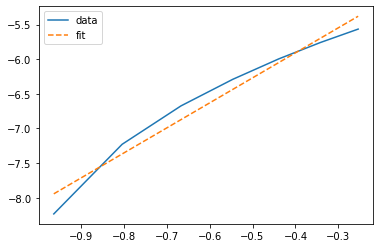

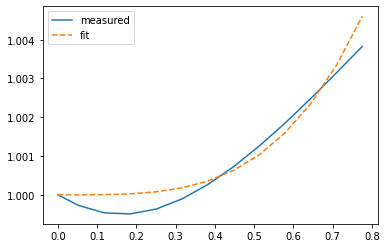

datapoints: 8 out of 13 available
force13_B_56
Fitres(a=2.876552607142054, b=0.018487694611205335, rsq=0.9823302779611646, a_err=0.15750080919638965, simul_name='force13_B_56')


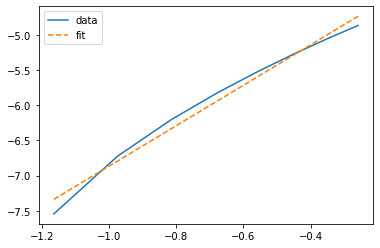

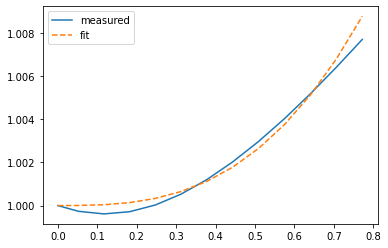

datapoints: 8 out of 13 available
force13_B_57
Fitres(a=2.416145002847317, b=0.03020818218440404, rsq=0.9948398538318612, a_err=0.07103980877301874, simul_name='force13_B_57')


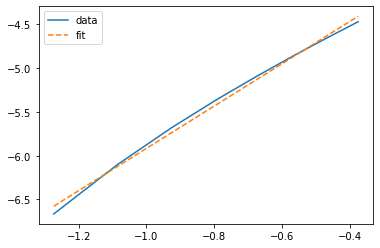

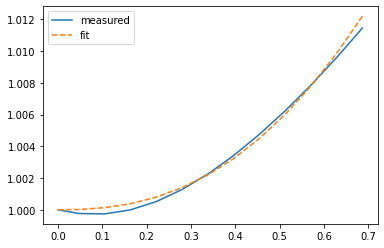

datapoints: 8 out of 13 available
force13_B_58
Fitres(a=3.646963515988641, b=0.010251490538210532, rsq=0.9651711313517298, a_err=0.3098232023134698, simul_name='force13_B_58')


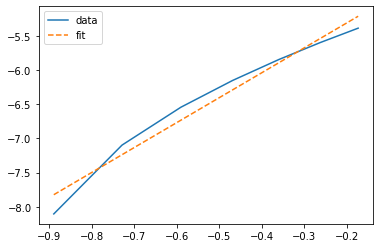

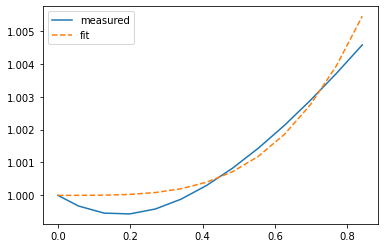

datapoints: 8 out of 13 available
force13_B_59
Fitres(a=6.690183715527291, b=0.008582855454825242, rsq=0.9017312908905926, a_err=1.27510653591669, simul_name='force13_B_59')


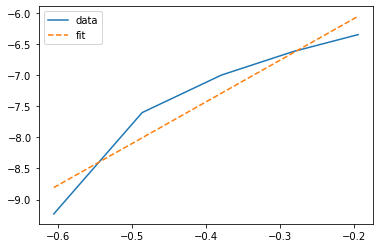

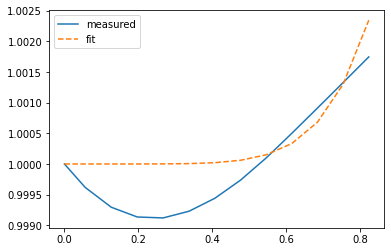

datapoints: 8 out of 13 available
force13_B_60
Fitres(a=2.677584263398242, b=0.025053445082759546, rsq=0.9871547327808758, a_err=0.12469426434691401, simul_name='force13_B_60')


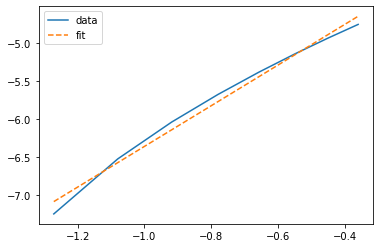

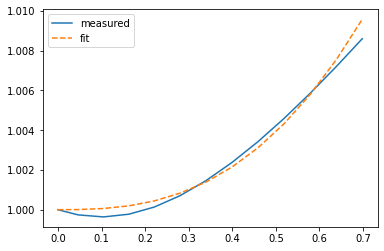

datapoints: 8 out of 13 available
force13_B_61
Fitres(a=2.2077414607956425, b=0.029812328050753532, rsq=0.9962010065138964, a_err=0.05565874054462618, simul_name='force13_B_61')


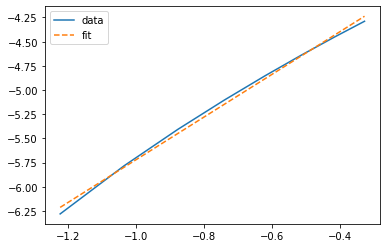

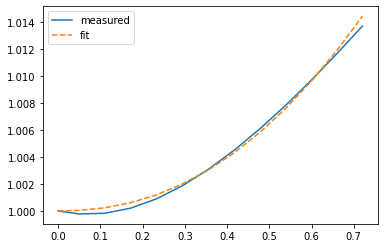

datapoints: 8 out of 13 available
force13_B_62
Fitres(a=7.431909703408546, b=0.037419279774437576, rsq=0.7645040495394214, a_err=1.8446639007034518, simul_name='force13_B_62')


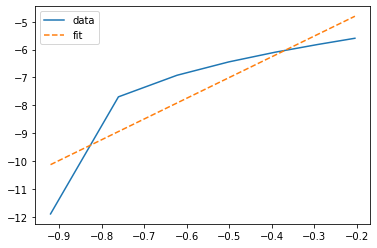

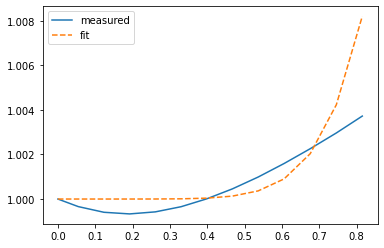

datapoints: 8 out of 13 available
force13_B_63
Fitres(a=4.130084423675422, b=0.016914210058320386, rsq=0.9460967347745298, a_err=0.44087319242220463, simul_name='force13_B_63')


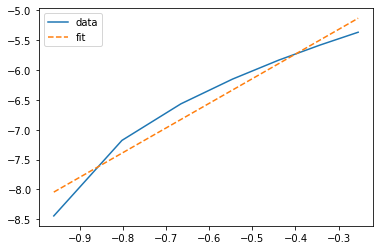

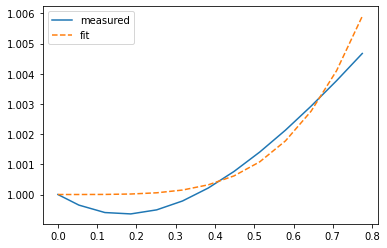

datapoints: 8 out of 13 available
force13_B_64
Fitres(a=3.4901717954325653, b=0.017529211250857327, rsq=0.9534261084884873, a_err=0.31491904285507677, simul_name='force13_B_64')


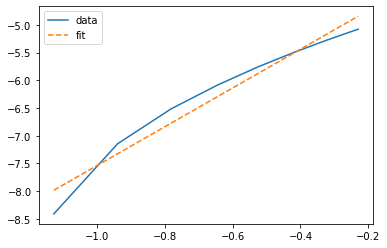

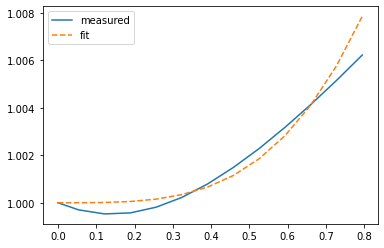

datapoints: 8 out of 13 available
force13_B_65
Fitres(a=2.656112268174765, b=0.01774324200401649, rsq=0.9882462356980598, a_err=0.11825695904091447, simul_name='force13_B_65')


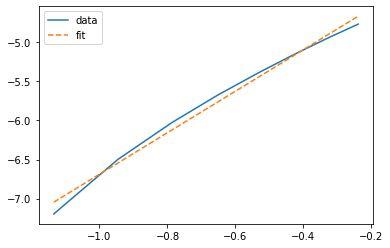

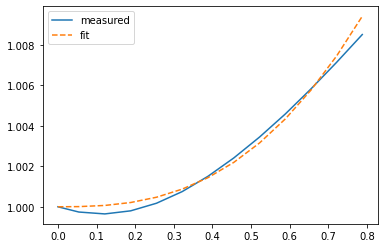

datapoints: 8 out of 13 available
force13_B_66
Fitres(a=4.797898308578665, b=0.02704781579969259, rsq=0.8662201193858102, a_err=0.7697623799954602, simul_name='force13_B_66')


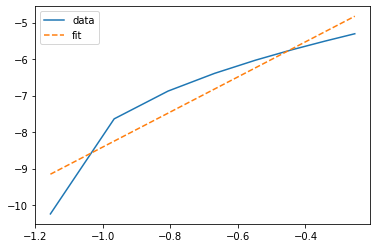

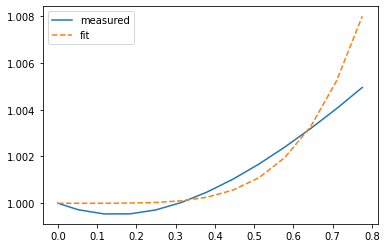

datapoints: 8 out of 13 available
force13_B_67
Fitres(a=4.32449854759597, b=0.015295112820669733, rsq=0.9378660742608498, a_err=0.49778836023043965, simul_name='force13_B_67')


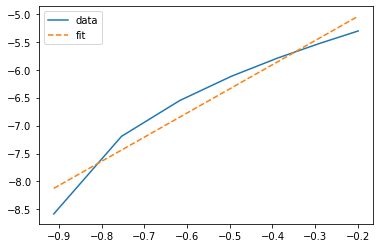

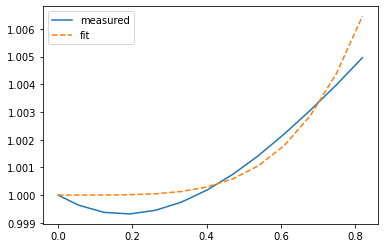

datapoints: 8 out of 13 available
force13_B_68
Fitres(a=4.398453317512772, b=0.023916686936888518, rsq=0.8836744314368283, a_err=0.6515020838994906, simul_name='force13_B_68')


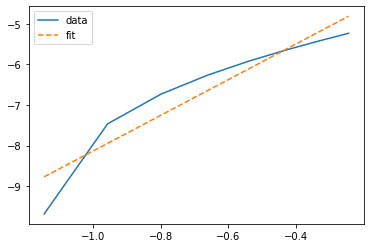

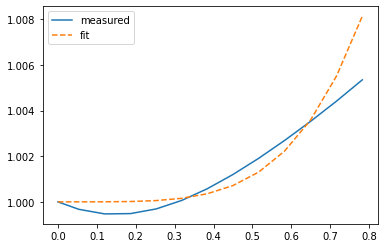

datapoints: 8 out of 13 available
force13_B_69
Fitres(a=3.5711616521307317, b=0.01173520627614367, rsq=0.9662110633778787, a_err=0.29865910985789945, simul_name='force13_B_69')


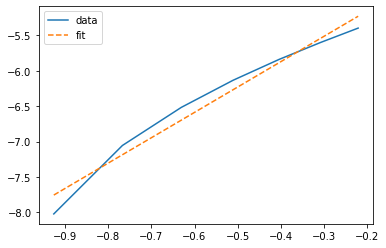

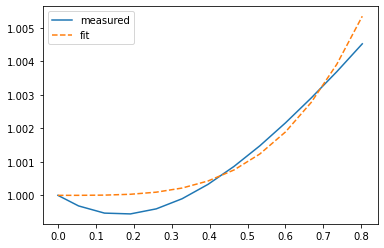

datapoints: 8 out of 13 available
force13_B_70
Fitres(a=4.991749308938256, b=0.008157367694039375, rsq=0.9636549745860007, a_err=0.5596981143191629, simul_name='force13_B_70')


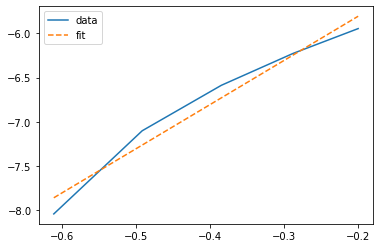

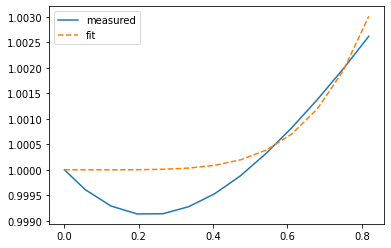

datapoints: 8 out of 13 available
force13_B_71
Fitres(a=2.5915282585258583, b=0.021233954397808046, rsq=0.9910360292453966, a_err=0.10062034853235245, simul_name='force13_B_71')


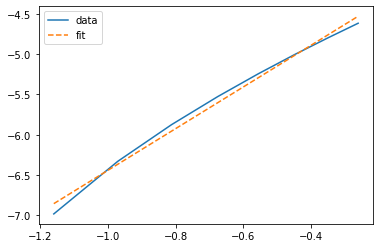

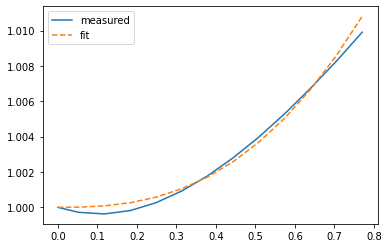

datapoints: 8 out of 13 available
force13_B_72
Fitres(a=2.6166411951806676, b=0.019663613856548995, rsq=0.9885043152352206, a_err=0.11519846374821749, simul_name='force13_B_72')


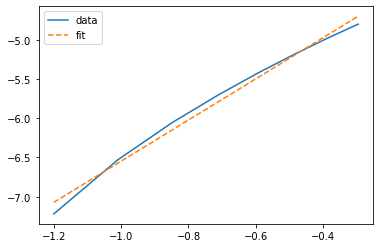

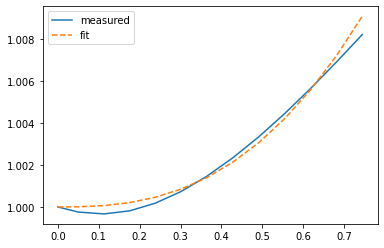

datapoints: 8 out of 13 available
force13_B_73
Fitres(a=3.1431807679573502, b=0.023973548135462763, rsq=0.9710129822620208, a_err=0.22170882650656878, simul_name='force13_B_73')


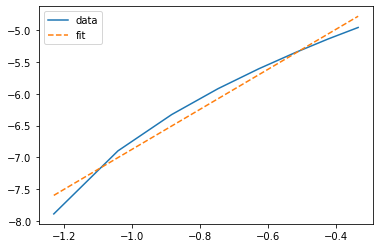

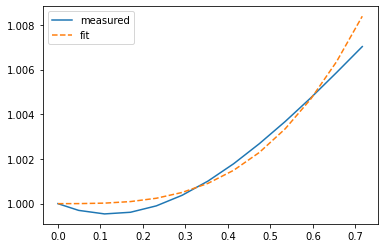

datapoints: 8 out of 13 available
force13_B_74
Fitres(a=2.5941445363820432, b=0.020887959079963235, rsq=0.990449786044713, a_err=0.10399413907786528, simul_name='force13_B_74')


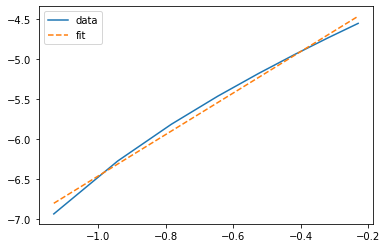

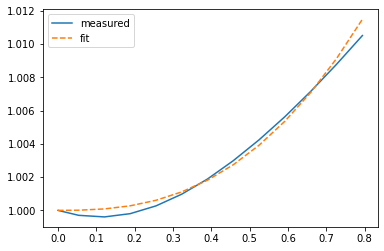

datapoints: 8 out of 13 available
force13_B_75
Fitres(a=2.3835561807752113, b=0.032857198621766635, rsq=0.9944527543517769, a_err=0.07267689912315921, simul_name='force13_B_75')


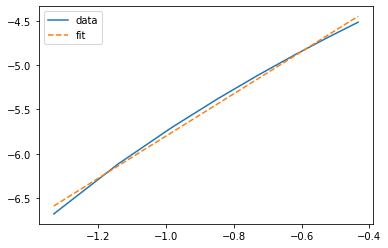

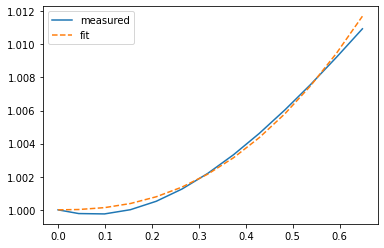

datapoints: 8 out of 13 available
force13_B_76
Fitres(a=4.390663790986755, b=0.012331185722564015, rsq=0.9290865187927807, a_err=0.5424772182824853, simul_name='force13_B_76')


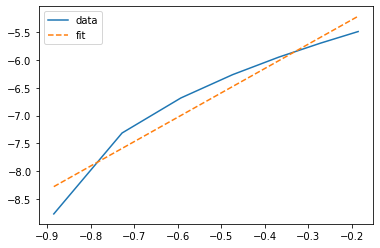

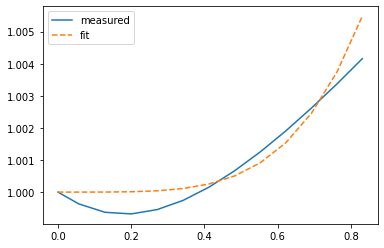

datapoints: 8 out of 13 available
force13_B_77
Fitres(a=4.629022780453634, b=0.0070661194443067165, rsq=0.9705834632643711, a_err=0.46527317836760046, simul_name='force13_B_77')


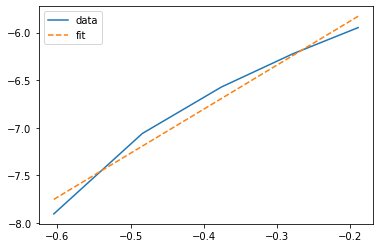

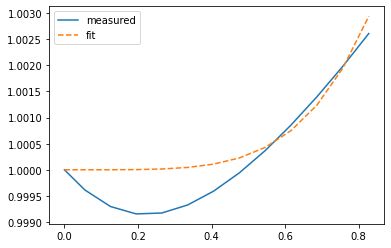

datapoints: 8 out of 13 available
force13_B_78
Fitres(a=2.295012249936665, b=0.02705292380297719, rsq=0.9951157598389057, a_err=0.06564037988438443, simul_name='force13_B_78')


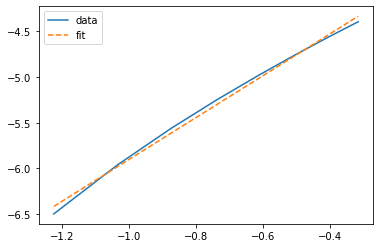

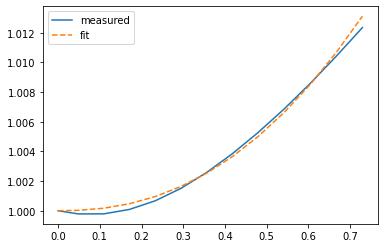

datapoints: 8 out of 13 available
force13_B_79
Fitres(a=2.2449537808604574, b=0.035912122845554756, rsq=0.997274762344176, a_err=0.04791004240237818, simul_name='force13_B_79')


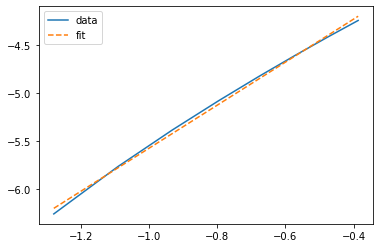

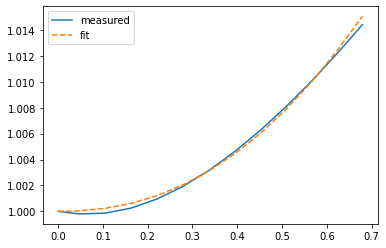

datapoints: 8 out of 13 available
force13_B_80
Fitres(a=2.618948403418814, b=0.02704636063916883, rsq=0.9883640169116485, a_err=0.11600972437584517, simul_name='force13_B_80')


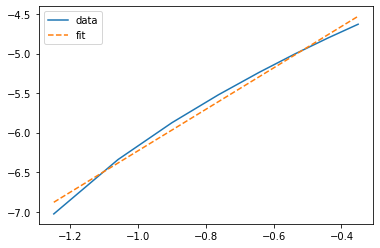

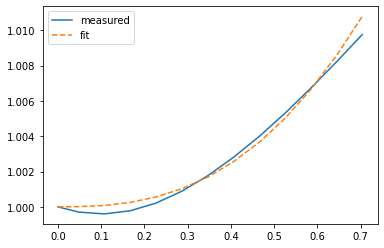

In [16]:
# fit through data
# model var(t)=b*t**a -> ln(var) = ln(b) + a*ln(t)
# so we find a and b by linear regression

@dataclass
class Fitres():
    a: float
    b: float
    rsq: float
    a_err : float
    simul_name : str
    
    def __call__(self, t):
        return self.b*t**self.a
        
    
simul2fit = {}

show = True
for simul, Re, var, t in zip(active_list, Re_list, relvar, time_elapsed):
    
    # only use the first values (or cutoff==None for use all)
    #cutoff = None
    cutoff = None
    e = cutoff
    
    s = 5
    
    # this ignores values that cant be put in log, not really the right way to go
    valid = (var[s:e] > 1)
    
    print(f"datapoints: {len(valid)} out of {len(var)} available")
    
    
    lnt = ln(t[s:e][valid])
    lnvar = ln(var[s:e][valid] -1)
    
    assert(np.all(~np.isnan(lnt)))
    assert(np.all(~np.isnan(lnvar)))
    
    
    linres = scipy.stats.linregress(lnt,lnvar)
    a, lnb = linres.slope, linres.intercept
    a_err = linres.stderr
    b = exp(lnb)
    rsq = linres.rvalue**2
    fitres = Fitres(a,b,rsq,a_err, simul)
    if show:
        print(simul)
        print(fitres)
        plt.plot(lnt, lnvar, label="data")
        plt.plot(lnt, lnb+ a*lnt, linestyle="--", label="fit")
        #plt.plot(lnt, ln(fitres(t[1:e][valid])), label="log of fitres")
        plt.legend()
        plt.show()
        
        plt.plot(t, var, label="measured")
        plt.plot(t, fitres(t)+1, linestyle="--", label="fit")
        plt.legend()
        plt.show()
        print("============")
    
    assert(fitres.simul_name == simul)
    simul2fit[simul] = fitres

A_correct_hel_zero_111
Fitres(a=2.2115130239269525, b=0.03203005323175706, rsq=0.9961357038496271, a_err=0.04355775113277584, simul_name='A_correct_hel_zero_111')


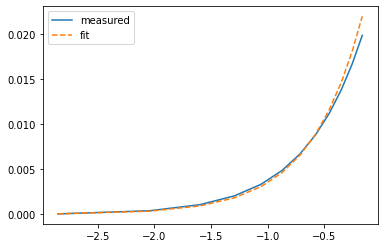

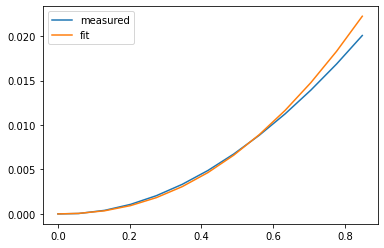

A_correct_hel_zero_130
Fitres(a=2.1417663413433132, b=0.0643140186744325, rsq=0.9979979738788946, a_err=0.03033486937530466, simul_name='A_correct_hel_zero_130')


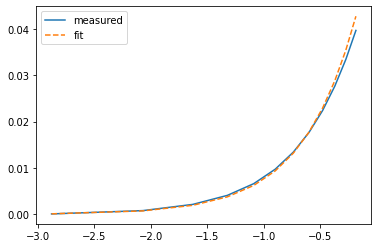

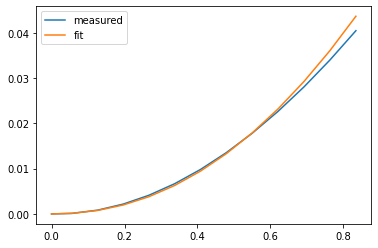

A_correct_hel_zero_152
Fitres(a=2.121121552573114, b=0.056532433633544814, rsq=0.9982756788343229, a_err=0.02787721542422363, simul_name='A_correct_hel_zero_152')


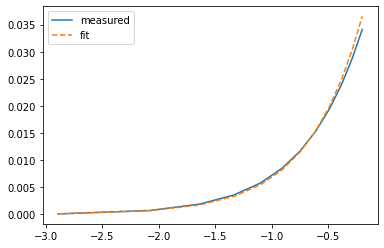

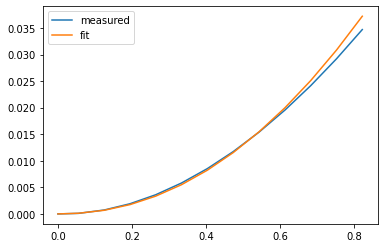

A_correct_hel_zero_182
Fitres(a=2.3556790316885556, b=0.04391560661966235, rsq=0.9899919050984871, a_err=0.07489899699623795, simul_name='A_correct_hel_zero_182')


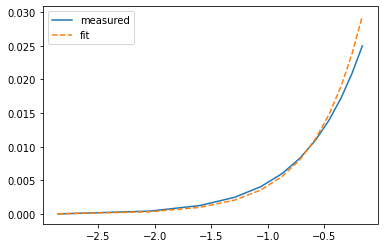

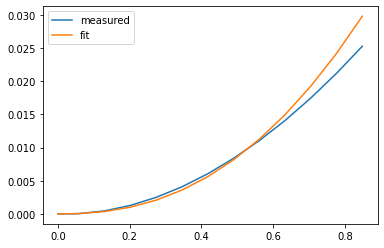

A_correct_hel_zero_147
Fitres(a=2.170101179658628, b=0.06505484048815084, rsq=0.9972727703229968, a_err=0.03588672771199601, simul_name='A_correct_hel_zero_147')


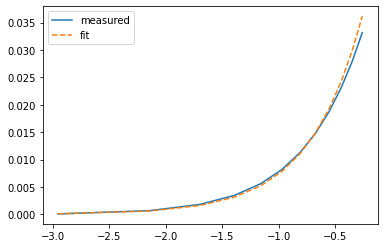

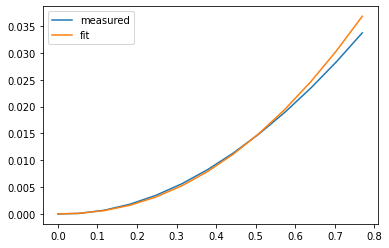

A_correct_hel_zero_134
Fitres(a=2.2050026374119613, b=0.042508194311459004, rsq=0.9963112753236373, a_err=0.04242772166597494, simul_name='A_correct_hel_zero_134')


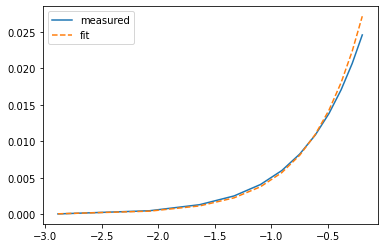

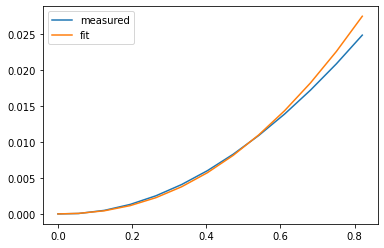

A_correct_hel_zero_108
Fitres(a=2.1938419227001833, b=0.04384620800128362, rsq=0.9968679276486551, a_err=0.038886818434918424, simul_name='A_correct_hel_zero_108')


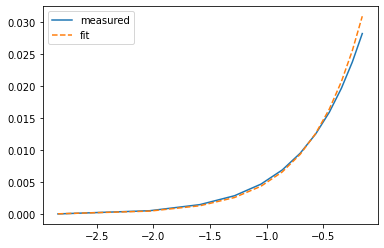

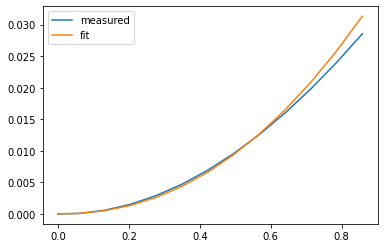

A_correct_hel_zero_176
Fitres(a=2.2405962323372526, b=0.032651063237189616, rsq=0.9946511684164775, a_err=0.051958626788953494, simul_name='A_correct_hel_zero_176')


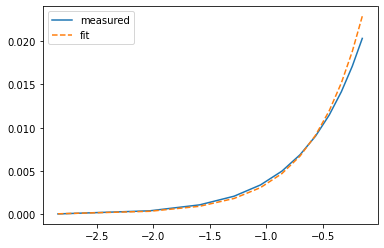

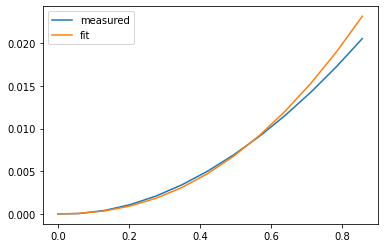

A_correct_hel_zero_107
Fitres(a=2.211423245071475, b=0.03825730533902452, rsq=0.9955392767412689, a_err=0.04681071893554866, simul_name='A_correct_hel_zero_107')


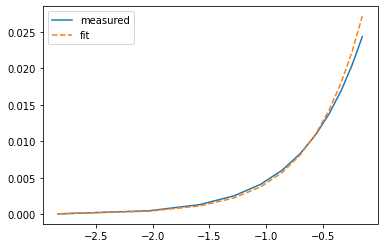

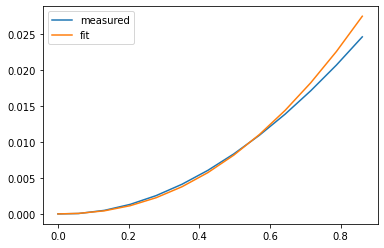

A_correct_hel_zero_125
Fitres(a=2.3507131079266568, b=0.034609942232725115, rsq=0.9899422690329731, a_err=0.07492809690495313, simul_name='A_correct_hel_zero_125')


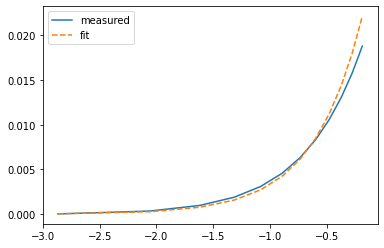

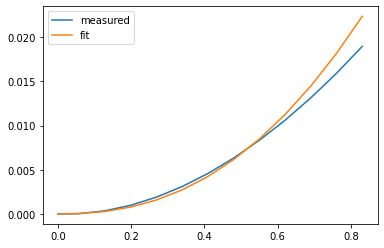

A_correct_hel_zero_165
Fitres(a=2.133574016542311, b=0.04299232115747214, rsq=0.9980690921877277, a_err=0.029676192543089893, simul_name='A_correct_hel_zero_165')


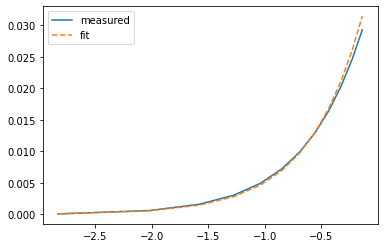

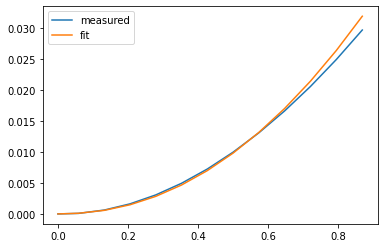

A_correct_hel_zero_159
Fitres(a=2.210600172738396, b=0.03684804598428962, rsq=0.9957968331774276, a_err=0.045416445665431515, simul_name='A_correct_hel_zero_159')


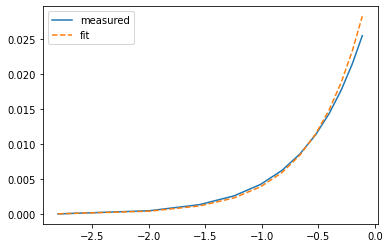

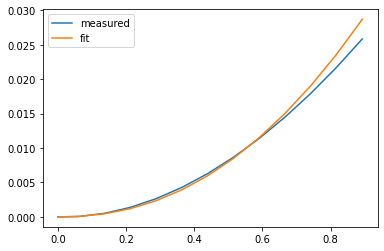

A_correct_hel_zero_199
Fitres(a=2.200924357345817, b=0.042354256754364744, rsq=0.996136245109219, a_err=0.043346149984068154, simul_name='A_correct_hel_zero_199')


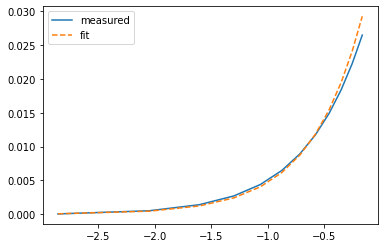

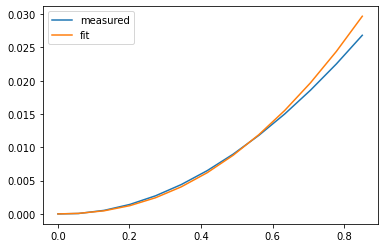

A_correct_hel_zero_164
Fitres(a=2.2173692090147274, b=0.041057113943374274, rsq=0.9956212874535816, a_err=0.04650119818929312, simul_name='A_correct_hel_zero_164')


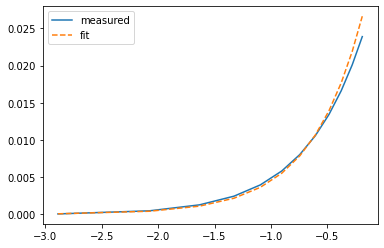

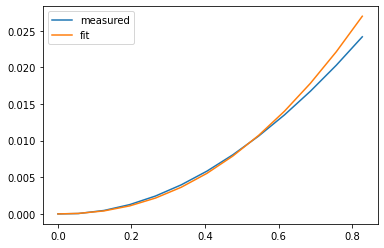

A_correct_hel_zero_174
Fitres(a=2.201739345079967, b=0.040212931667912795, rsq=0.9959790397720273, a_err=0.04423903985119481, simul_name='A_correct_hel_zero_174')


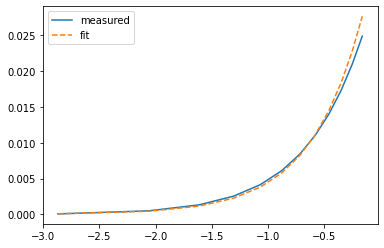

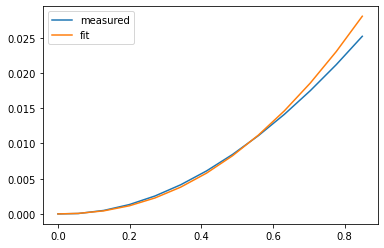

A_correct_hel_zero_179
Fitres(a=2.148505037626947, b=0.05245621535787814, rsq=0.9975345482494413, a_err=0.033776967600071726, simul_name='A_correct_hel_zero_179')


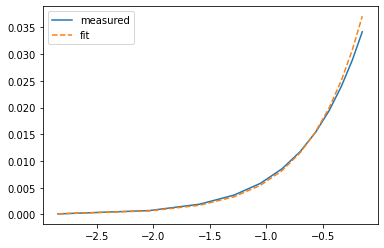

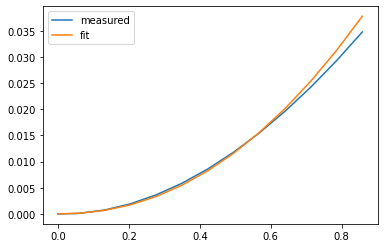

A_correct_hel_zero_139
Fitres(a=2.2122066110683285, b=0.03948632811187751, rsq=0.9956737848207065, a_err=0.04611276965700296, simul_name='A_correct_hel_zero_139')


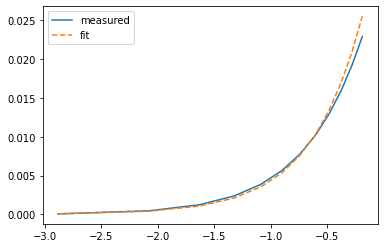

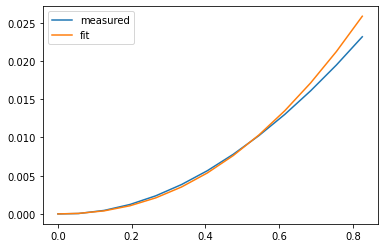

A_correct_hel_zero_190
Fitres(a=2.2123245051085307, b=0.024261396226911692, rsq=0.997460356462842, a_err=0.03721055391905712, simul_name='A_correct_hel_zero_190')


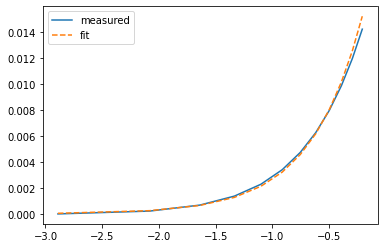

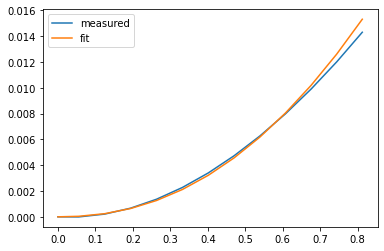

In [134]:
# visual checks on quality of fit

for simul, fitfun in list(simul2fit.items())[::5]:
    
    
    print("======================")
    assert(simul==fitfun.simul_name)
    print(simul)
    print(fitfun)
    
    # normalize and set to time since zero, otherwise no point
    t = res[simul]["real_time"] - res[simul]["real_time"][0]
    var = res[simul]["var"]/res[simul]["var"][0] -1
    
    plt.plot(ln(t[1:]), ln(var[1:] + 1), label="measured")
    plt.plot(ln(t[1:]), ln(fitfun(t[1:])+1), linestyle="--",  label="fit")
    plt.legend()
    plt.show()
    
    plt.plot(t,var, label="measured")
    plt.plot(t,fitfun(t), label="fit")
    plt.legend()
    plt.show()
    
    
# it seems like the slope of the (logarithmic) data decreases with time, so a single exponential is maybe not accurate    

3.6747879120539833
-1.5523312856957732 6.440751878567532


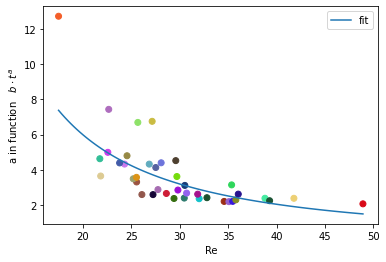

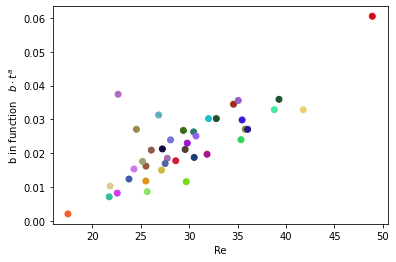

In [18]:
slope_vals = [fitres.a for _,fitres in simul2fit.items()]
intercept_vals = [fitres.b for _,fitres in simul2fit.items()]
print(stat.mean(slope_vals))

# powerlaw fit through data assuming eq16 from Petry where c0 is const and sigma_half is a number
# lambda = c0*Re^sigma -> ln(lambda) = lnc0 + sigma*ln(Re)
valid_Re = np.array(Re_list)[~np.isnan(slope_vals)]
valid_slopes = np.array(slope_vals)[~np.isnan(slope_vals)]
fit = scipy.stats.linregress(ln(valid_Re), ln(valid_slopes))
sigma, lnc0 = fit.slope, fit.intercept
print(sigma, lnc0)
c0 = np.exp(lnc0)
Re_range = np.linspace(min(valid_Re), max(valid_Re), 100)


rand_color = np.random.rand(len(Re2simul),3)
plt.scatter(Re_list, slope_vals, c=rand_color)
plt.plot(Re_range, c0*Re_range**sigma, label="fit")
plt.ylabel("a in function   $b\cdot t^a$")
plt.xlabel("Re")
plt.legend()
plt.show()

plt.scatter(Re_list, intercept_vals, c=rand_color)
plt.ylabel("b in function   $b\cdot t^a$")
plt.xlabel("Re")
plt.show()

In [136]:
# bin by Re, then calculate an average for each bin
bins = list(range(70,150,5))
for i in range(len(bins)-1):
    low = bins[i]
    hi = bins[i+1]
    center = (low+hi)/2
    slopes = valid_slopes[np.logical_and(low <= valid_Re,valid_Re < hi)]
    print(center, len(slopes), round(np.mean(slopes),3) if len(slopes) > 0 else "-")

72.5 0 -
77.5 3 2.441
82.5 6 2.361
87.5 17 2.276
92.5 18 2.296
97.5 20 2.194
102.5 7 2.274
107.5 7 2.151
112.5 4 2.163
117.5 4 2.229
122.5 1 2.132
127.5 0 -
132.5 0 -
137.5 0 -
142.5 0 -


In [126]:
print("Re: ", np.mean(valid_Re))
print("slope: ",np.mean(valid_slopes))

Re:  97.8174532705429
slope:  2.26225113581259


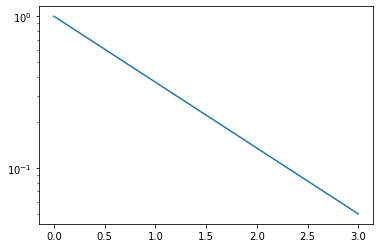

/usr/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
/usr/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


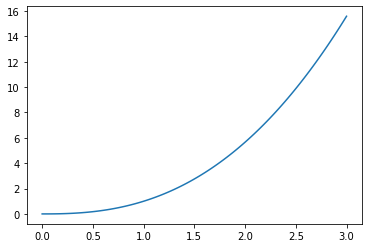

'\nwith open("low_perturb", "r") as f:\n    s = f.read()\n    data = json.loads(s)\n    \ntimes = np.array(list(map(int, data.keys())))\nnaive_var = np.array([data[str(t)]["naive_var"] for t in times])\nplt.plot(times, naive_var)\n'

[0.40824829 0.81649658 0.40824829]
(128, 128, 128)
(3,)


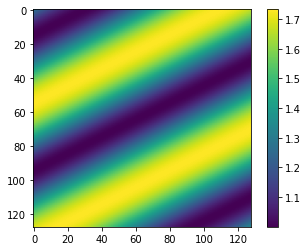

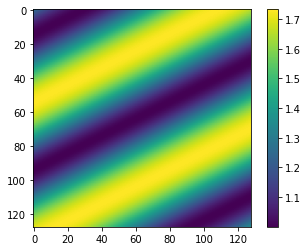

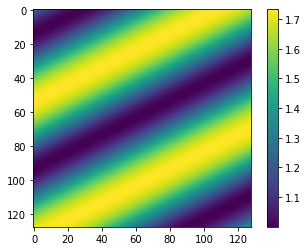

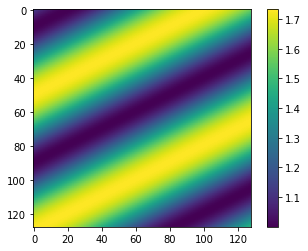

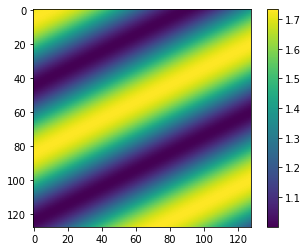

In [113]:
def next_int(x,c):
    return (x) + c-(x)%c

for i in range(20):
    print(i, next_int(i,2))

0 2
1 2
2 4
3 4
4 6
5 6
6 8
7 8
8 10
9 10
10 12
11 12
12 14
13 14
14 16
15 16
16 18
17 18
18 20
19 20


In [114]:
baserun_len = 20000
baserun_dump_freq = 1000
perturbation_len = 3
perturbation_dump_freq = 1
final_len = 100
final_dump_freq = 5

# x+c-x%c is the first number strictly bigger than x that is divisible by c
def next_int(x,c):
    return x+c-x%c

baserun_dump_steps = range(0,baserun_len+1, baserun_dump_freq)
perturbation_dump_steps = range(next_int(baserun_len,perturbation_dump_freq), baserun_len+perturbation_len+1, perturbation_dump_freq)
final_dump_steps = range(next_int(baserun_len+perturbation_len, final_dump_freq), baserun_len+perturbation_len+final_len+1, final_dump_freq)

for i in baserun_dump_steps:
    print(i)
print("====")
for i in perturbation_dump_steps:
    print(i)
print("====")
for i in final_dump_steps:
    print(i)
print("====")

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
====
20001
20002
20003
====
20005
20010
20015
20020
20025
20030
20035
20040
20045
20050
20055
20060
20065
20070
20075
20080
20085
20090
20095
20100
====


In [115]:
for k,v in locals().items():
    if len(k)<=3:
        print(k,str(v)[:10])

_ih ['', 'impo
_oh {4: ['deta
_dh ['/home/ju
In ['', 'impo
Out {4: ['deta
_ 
with open
__ ['A_hel_ha
___ ['A_hel_ha
_i baserun_le
_ii def next_i
_i1 import num
np <module 'n
ln <ufunc 'lo
rec <module 'n
dot <function 
Inf inf
inf inf
nan nan
NaN nan
all <function 
any <function 
ptp <function 
put <function 
std <function 
sum <function 
var [0.0000000
NAN nan
add <ufunc 'ad
cos <ufunc 'co
e [0.5773502
exp <ufunc 'ex
gcd <ufunc 'gc
lcm <ufunc 'lc
log <ufunc 'lo
mod <ufunc 're
pi 3.14159265
sin <ufunc 'si
tan <ufunc 'ta
mat <function 
r_ <numpy.lib
c_ <numpy.lib
s_ <numpy.lib
ix_ <function 
cov <function 
i0 <function 
eye <function 
tri <function 
fix <function 
pad <function 
who <function 
fv <function 
pmt <function 
pv <function 
irr <function 
npv <function 
fft <module 'n
ma <module 'n
plt <module 'm
os <module 'o
csv <module 'c
it <module 'i
_i2 print("\n"
_i3 interestin
_i4 def filter
_4 ['detailed
_i5 def filter
_i6 interestin
_i7 def filter
_7 ['new_hel_
_i8 all_simuls
_i9 al